# **Car Prices Prediction**


### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline

In [2]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.8 MB/s eta 0:00:00


In [3]:
from category_encoders import TargetEncoder, OneHotEncoder

In [4]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading the data

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Car Price Prediction/data.csv')

In [6]:
data.shape

(11914, 16)

In [7]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [8]:
data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [10]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Countplot of the total cars per different years

In [11]:
data.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


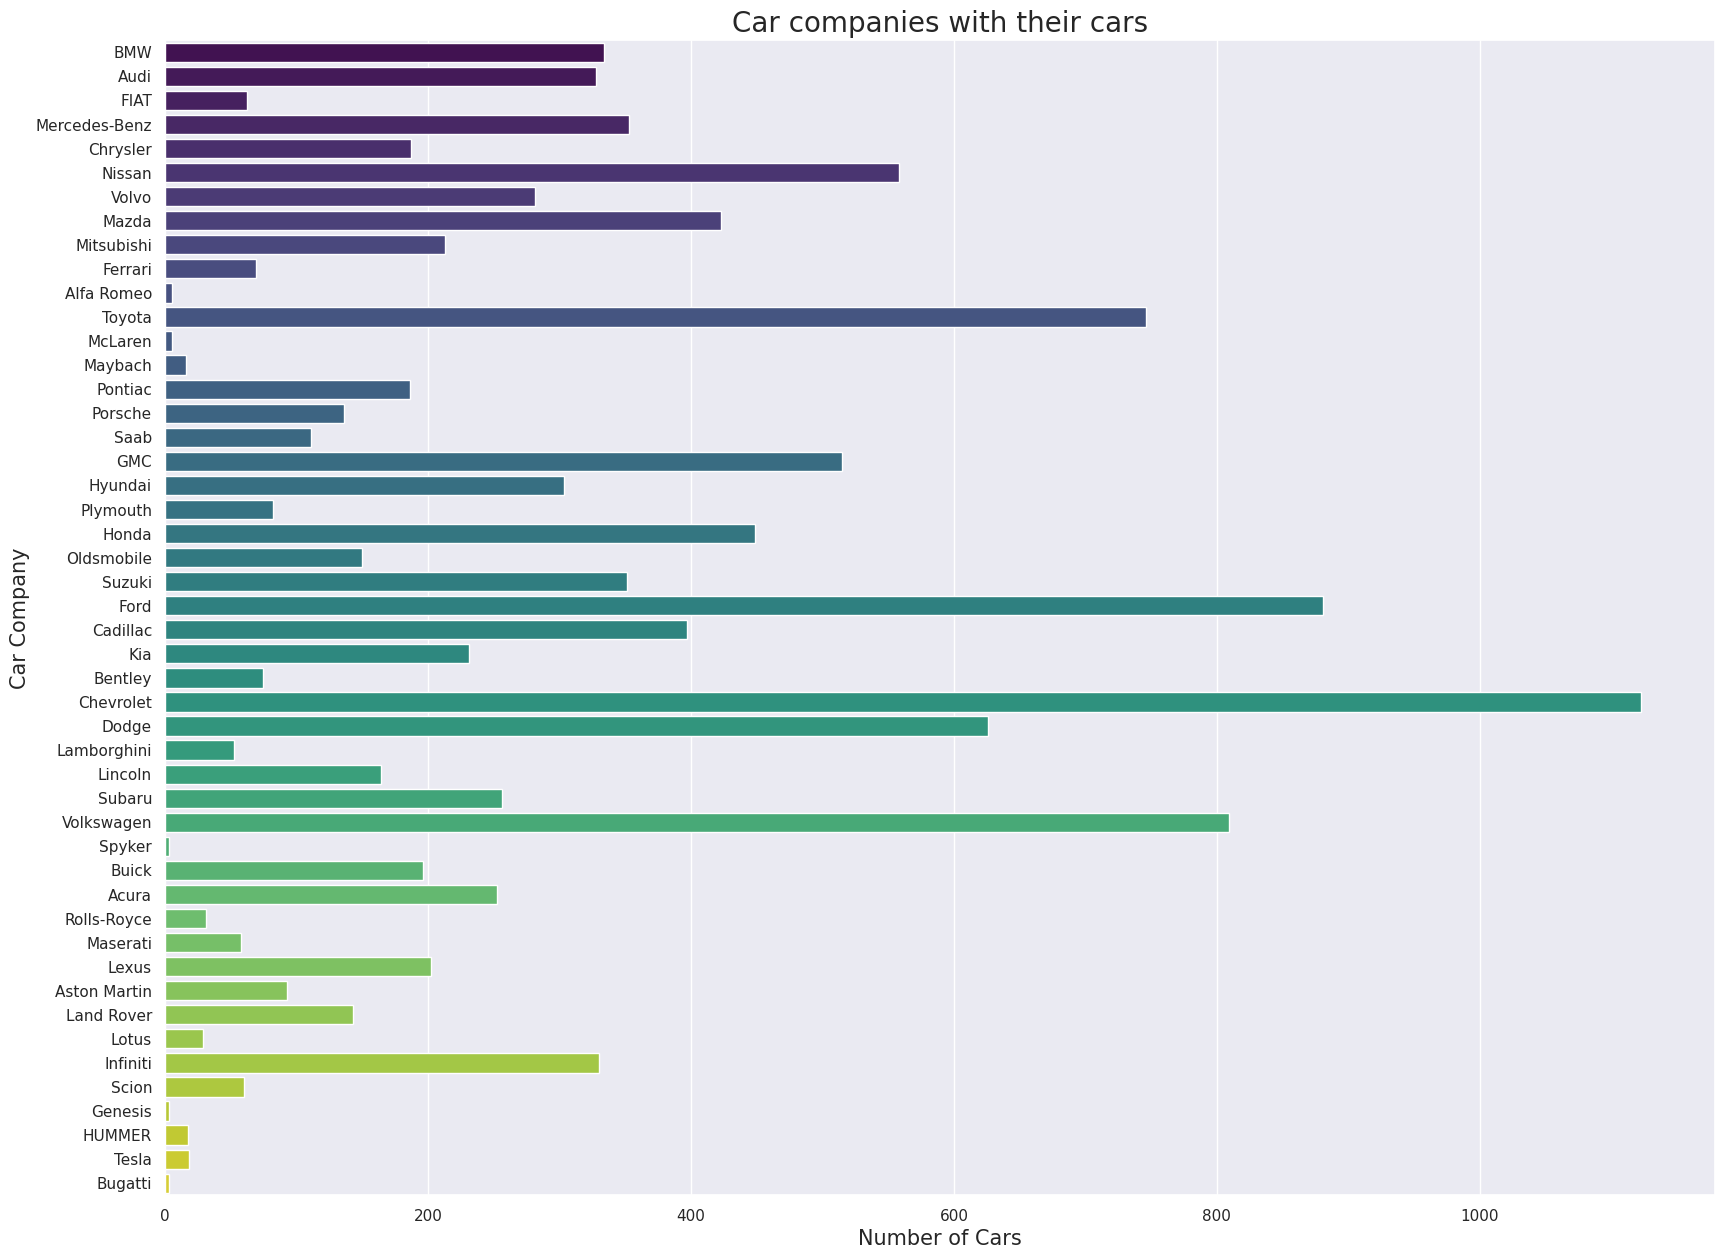

In [12]:
# Set the figure size
plt.figure(figsize=(20, 15))

# Create a count plot with different colors
sns.countplot(y=data['Make'], palette='viridis')

# Add title and labels
plt.title("Car companies with their cars", fontsize=20)
plt.xlabel("Number of Cars", fontsize=15)
plt.ylabel("Car Company", fontsize=15)

# Show the plot
plt.show()

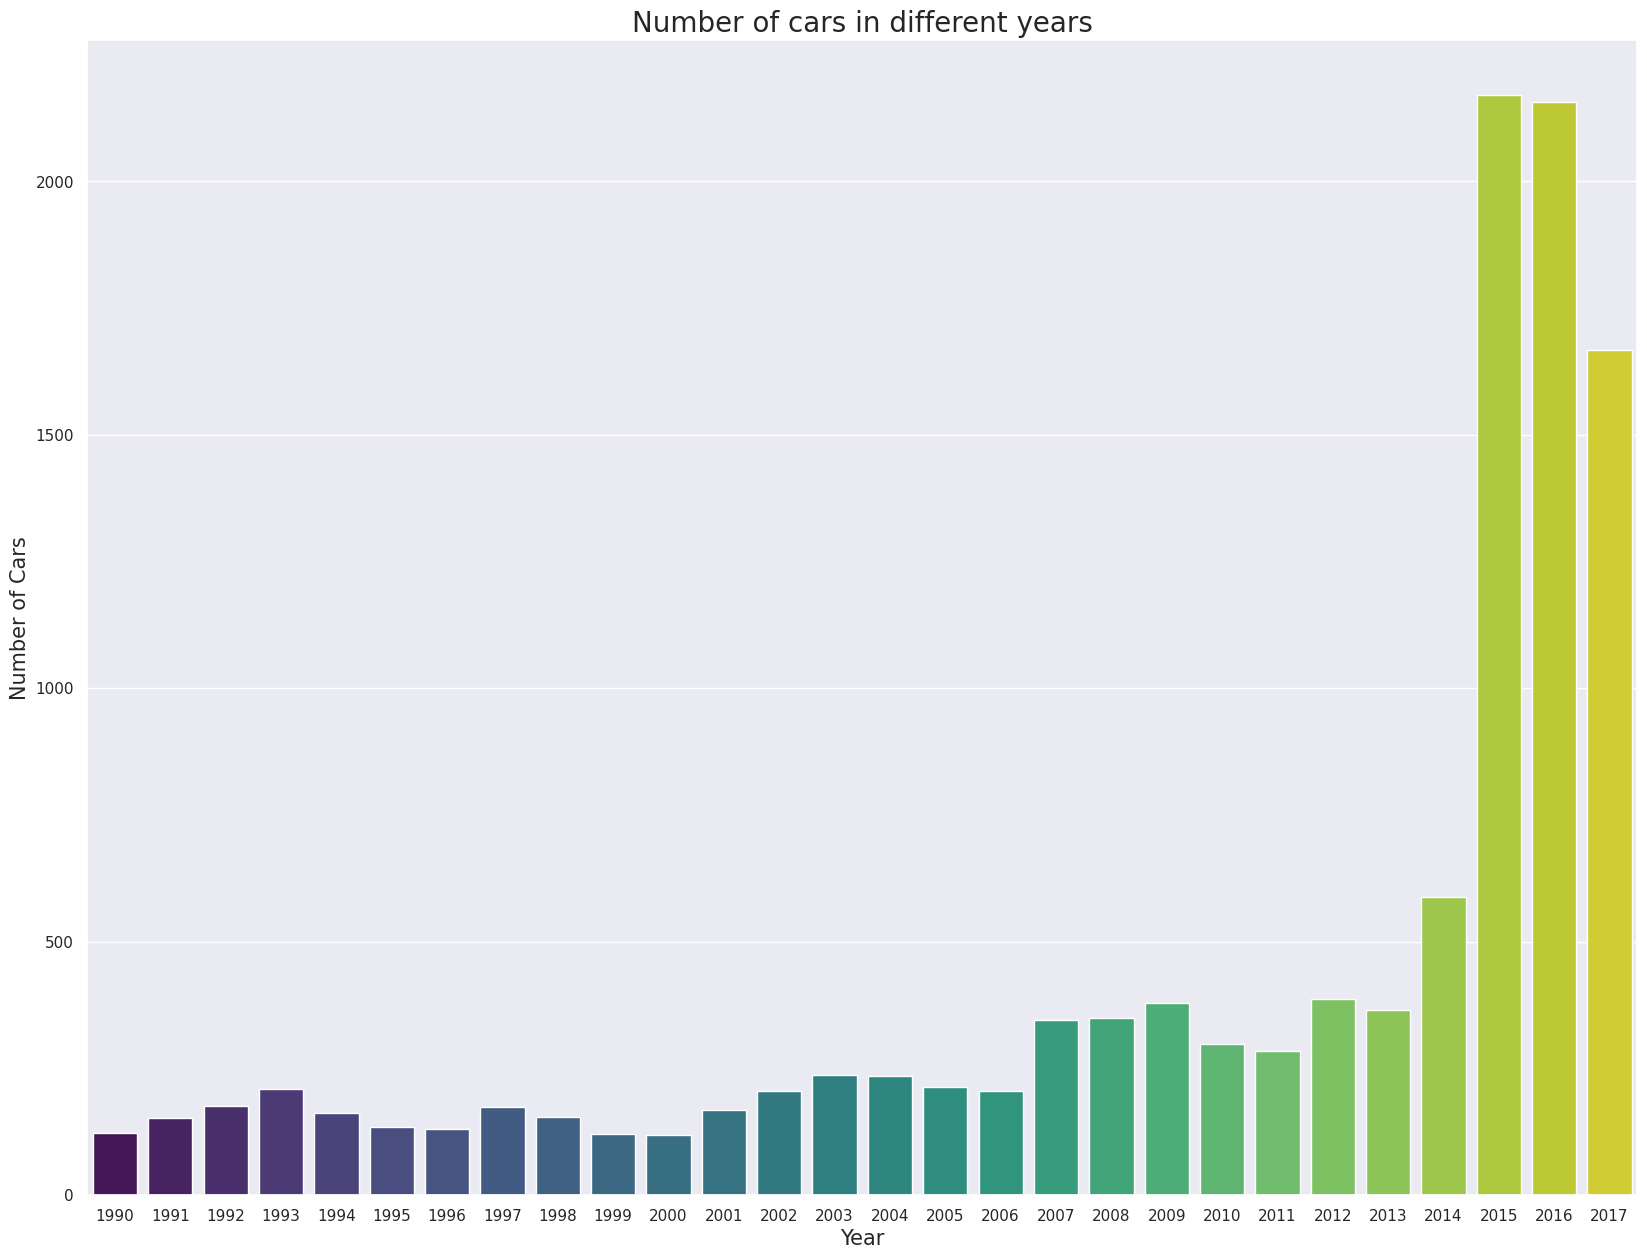

In [13]:
# Set the figure size
plt.figure(figsize=(20, 15))

# Create a count plot with different colors for each year
sns.countplot(x=data['Year'], palette='viridis')

# Add title and labels
plt.title("Number of cars in different years", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of Cars", fontsize=15)

# Show the plot
plt.show()

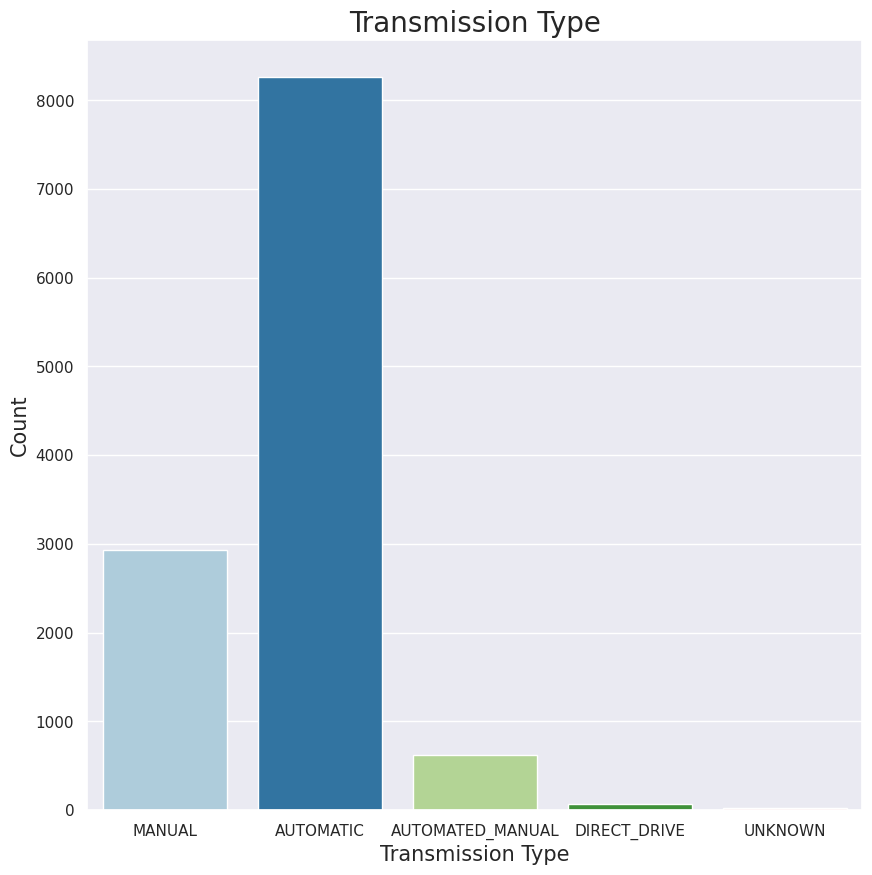

In [14]:

# Set the figure size
plt.figure(figsize=(10, 10))

# Create a count plot with different colors for each transmission type
sns.countplot(x=data['Transmission Type'], palette='Paired')

# Add title and labels
plt.title("Transmission Type", fontsize=20)
plt.xlabel("Transmission Type", fontsize=15)
plt.ylabel("Count", fontsize=15)

# Show the plot
plt.show()

In [15]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [16]:
data.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


### Countplot of Engine Fuel Type

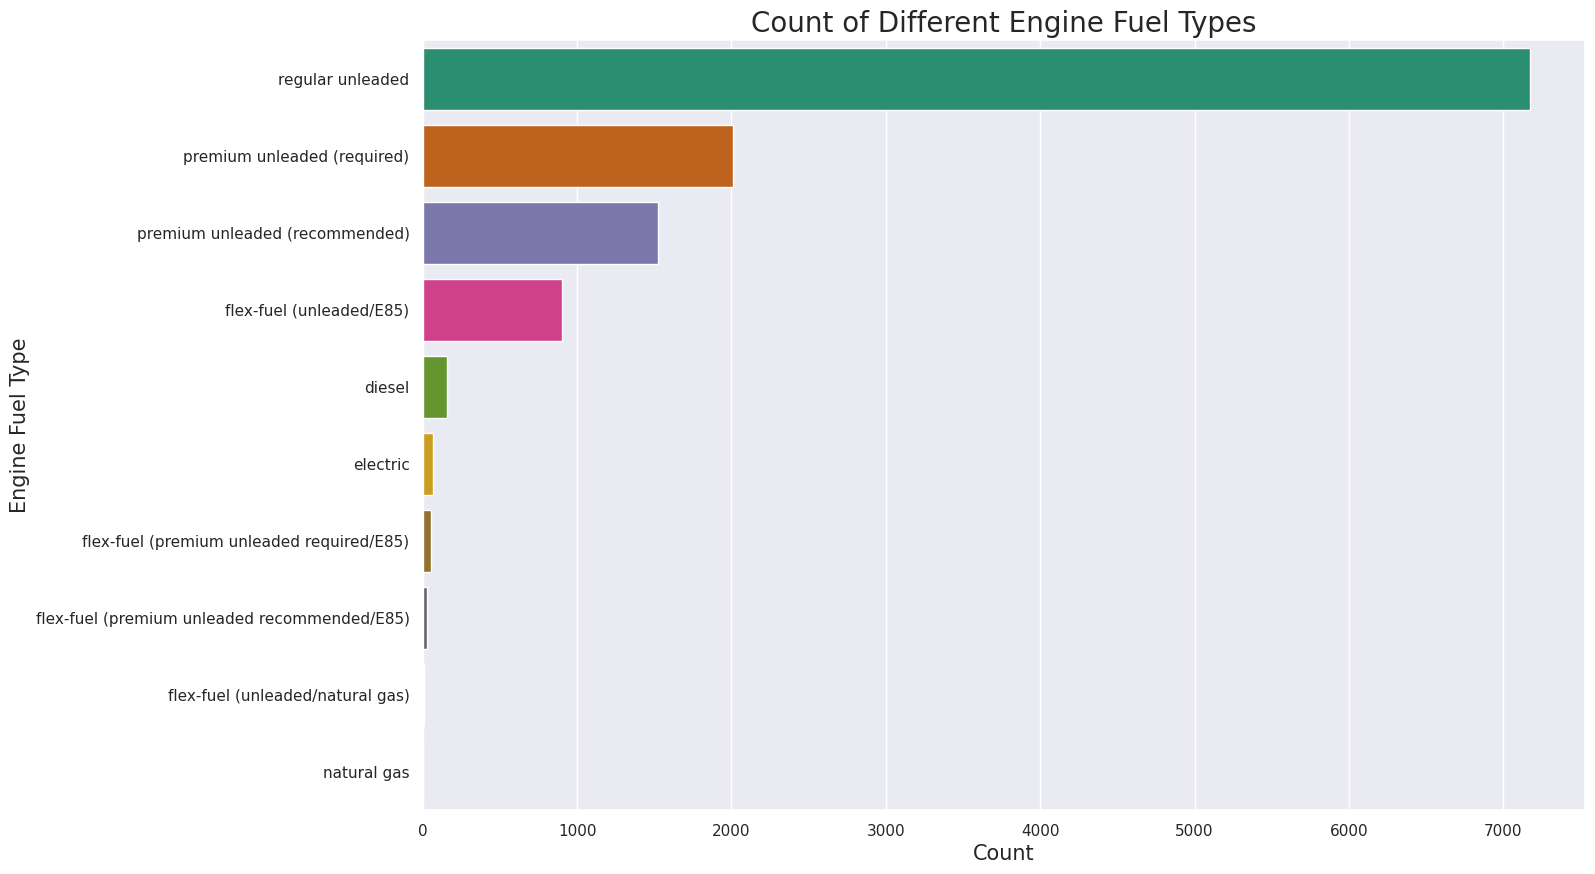

In [17]:
# Sort the data by 'Engine Fuel Type'
sorted_data = data['Engine Fuel Type'].value_counts().index

# Set the figure size
plt.figure(figsize=(15, 10))

# Create the count plot
sns.countplot(y=data['Engine Fuel Type'], order=sorted_data, palette='Dark2')

# Add title and labels
plt.title("Count of Different Engine Fuel Types", fontsize=20)
plt.xlabel("Count", fontsize=15)
plt.ylabel("Engine Fuel Type", fontsize=15)

# Show the plot
plt.show()

### Countplot of Vehicle Size

<Axes: xlabel='Vehicle Size', ylabel='count'>

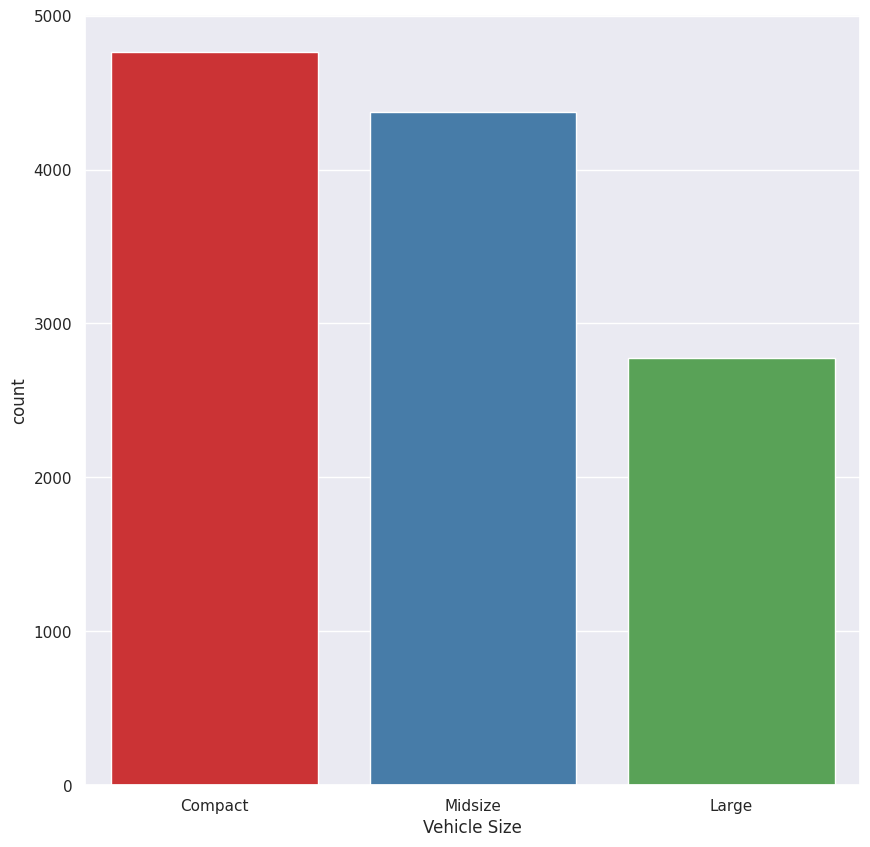

In [18]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'Vehicle Size', data = data, palette = 'Set1')

### Missingno

<Axes: >

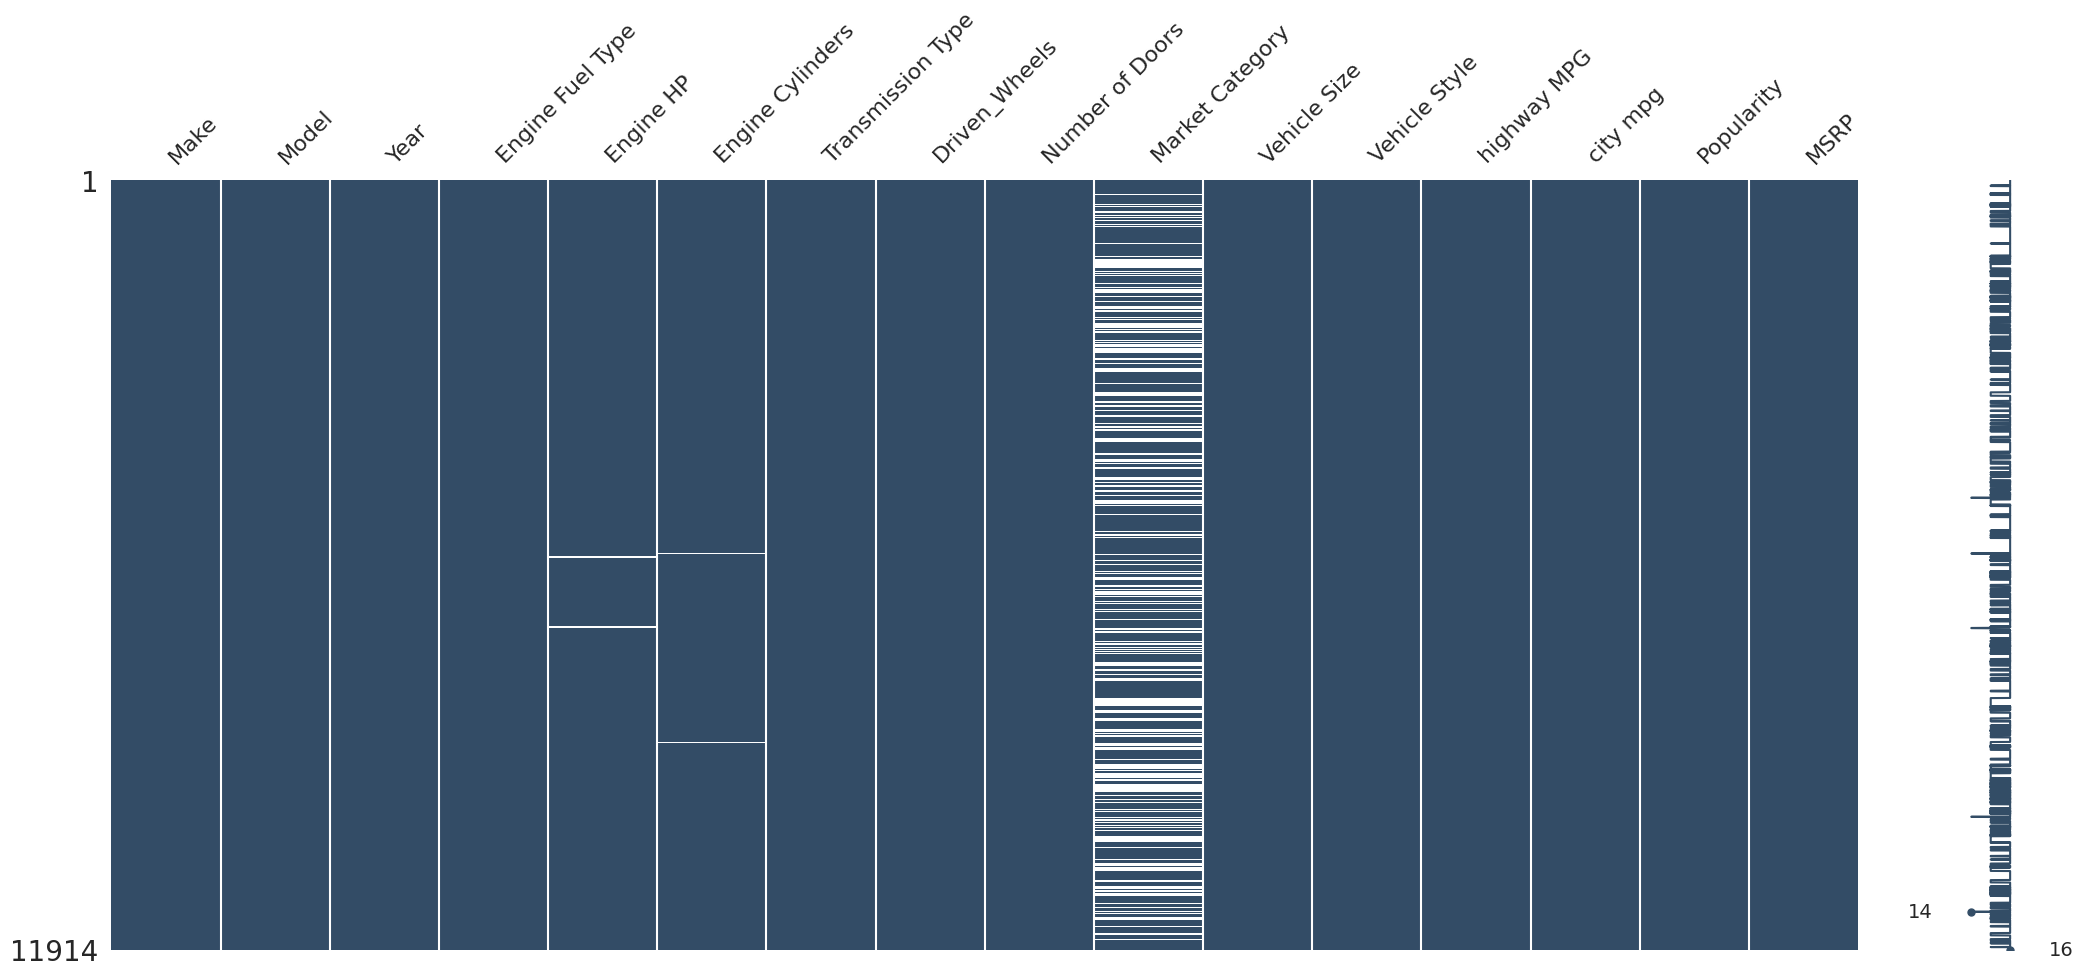

In [19]:
msno.matrix(data, color = (0.2,0.3,0.4))

### Groupby with 'Make' feature

In [20]:
data.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [21]:

data.groupby('Make')[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']].agg(['min', 'max', 'mean'])

Engine HP                      Engine Cylinders        \
                    min     max         mean              min   max   
Make                                                                  
Acura             111.0   573.0   244.797619              4.0   6.0   
Alfa Romeo        237.0   237.0   237.000000              4.0   4.0   
Aston Martin      420.0   568.0   484.322581              8.0  12.0   
Audi              108.0   610.0   277.695122              4.0  12.0   
BMW               170.0   600.0   326.907186              0.0  12.0   
Bentley           400.0   631.0   533.851351              8.0  12.0   
Bugatti          1001.0  1001.0  1001.000000             16.0  16.0   
Buick             138.0   310.0   219.244898              4.0   8.0   
Cadillac          140.0   640.0   332.309824              4.0   8.0   
Chevrolet          55.0   650.0   246.972247              0.0   8.0   
Chrysler          100.0   385.0   229.139037              4.0   8.0   
Dodge              92.0   707.0   244.415335              4.0  10.0   
FIAT              101.0   180.0   143.559322              0.0   4.0   
Ferrari           400.0   731.0   511.956522              8.0  12.0   
Ford               63.0   662.0   243.097926              0.0   8.0   
GMC               105.0   420.0   259.844660              4.0   8.0   
Genesis           311.0   420.0   347.333333              6.0   8.0   
HUMMER            239.0   300.0   261.235294              5.0   8.0   
Honda              62.0   280.0   195.749441              0.0   6.0   
Hyundai            81.0   429.0   201.917492              4.0   8.0   
Infiniti          145.0   420.0   310.066667              4.0   8.0   
Kia               125.0   420.0   206.827434              0.0   8.0   
Lamborghini       550.0   750.0   614.076923             10.0  12.0   
Land Rover        174.0   550.0   322.097902              4.0   8.0   
Lexus             134.0   552.0   277.415842              4.0  10.0   
Lincoln           188.0   380.0   284.910256              4.0   8.0   
Lotus             189.0   400.0   275.965517              4.0   8.0   
Maserati          345.0   523.0   420.793103              6.0   8.0   
Maybach           543.0   631.0   590.500000             12.0  12.0   
Mazda              82.0   274.0   171.992908              4.0   6.0   
McLaren           562.0   641.0   610.400000              8.0   8.0   
Mercedes-Benz     121.0   641.0   350.181818              0.0  12.0   
Mitsubishi         66.0   320.0   173.429245              3.0   8.0   
Nissan             90.0   600.0   239.921533              0.0   8.0   
Oldsmobile        110.0   275.0   177.466667              4.0   8.0   
Plymouth           92.0   253.0   131.560976              4.0   6.0   
Pontiac            74.0   415.0   190.295699              4.0   8.0   
Porsche           208.0   605.0   392.794118              4.0  10.0   
Rolls-Royce       322.0   624.0   487.548387              8.0  12.0   
Saab              150.0   390.0   220.522523              4.0   8.0   
Scion              94.0   200.0   154.433333              4.0   4.0   
Spyker            400.0   400.0   400.000000              8.0   8.0   
Subaru             66.0   305.0   197.308594              3.0   6.0   
Suzuki             66.0   261.0   160.287749              4.0   6.0   
Tesla               NaN     NaN          NaN              0.0   0.0   
Toyota             93.0   381.0   236.147849              0.0   8.0   
Volkswagen         81.0   444.0   189.757726              4.0  12.0   
Volvo             114.0   345.0   230.971530              4.0   6.0   

                         highway MPG                 city mpg                  
                    mean         min  max       mean      min  max       mean  
Make                                                                           
Acura           5.333333          17   38  28.111111       13   39  19.940476  
Alfa Romeo      4.000000          34   34  34.000000       24   24  24.0

### Grouping the data on the basis of Year

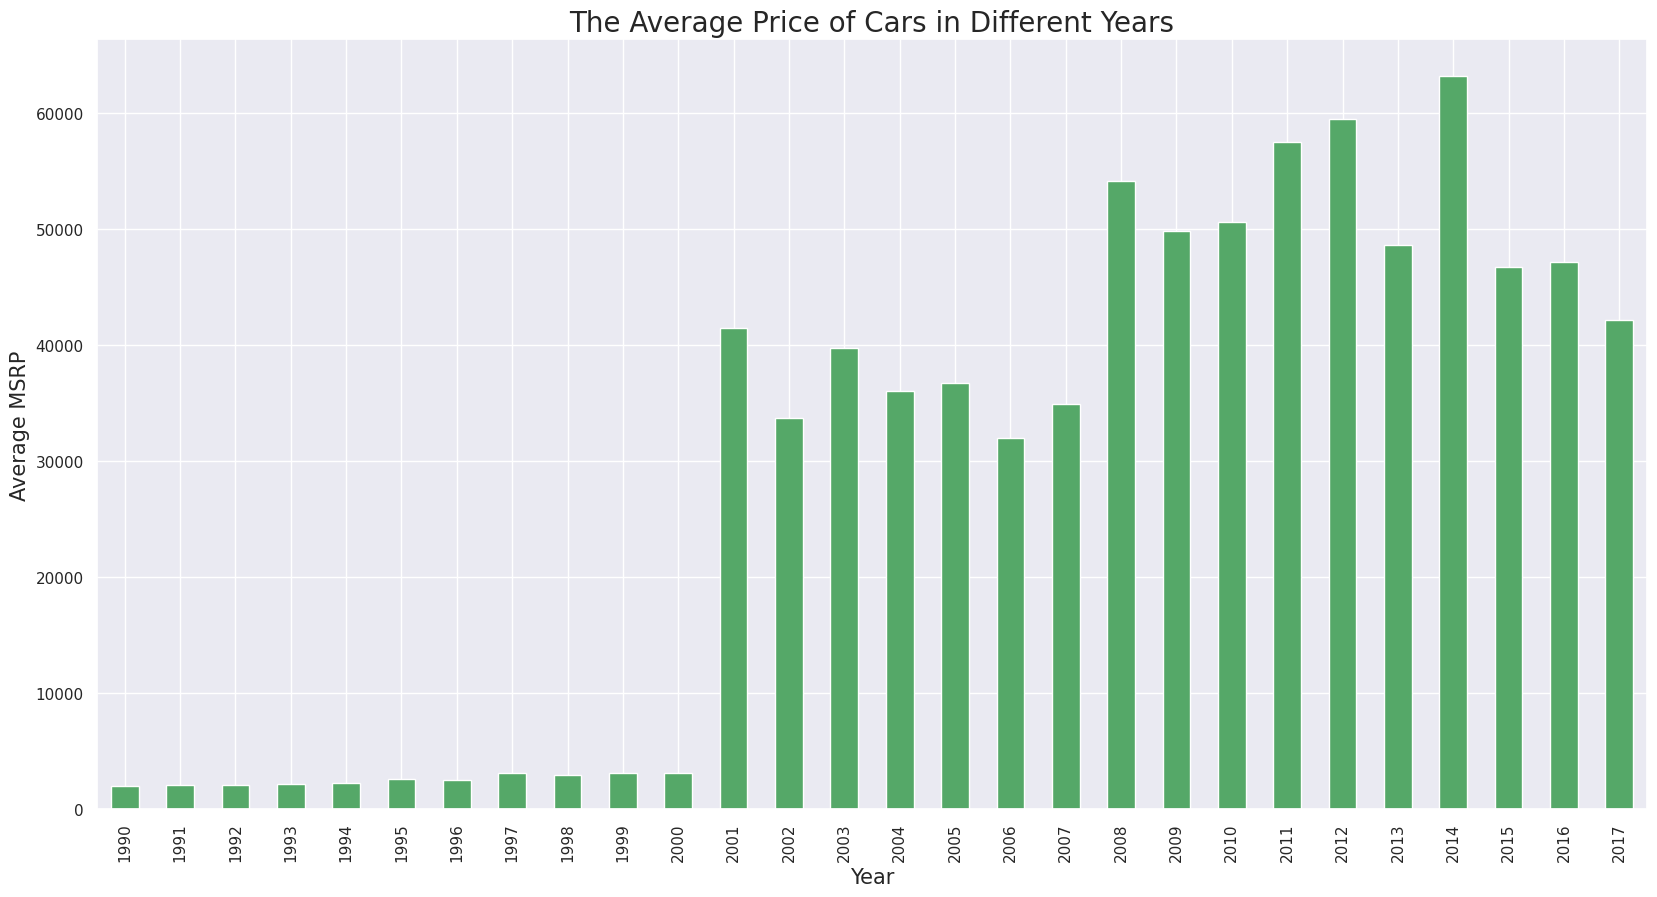

In [22]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Group the data by 'Year' and calculate the mean MSRP, then plot it
data.groupby('Year')['MSRP'].mean().plot(kind='bar', color='g')

# Add title and labels
plt.title("The Average Price of Cars in Different Years", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average MSRP", fontsize=15)

# Show the plot
plt.show()

### Grouping on the basis of Transmission Type

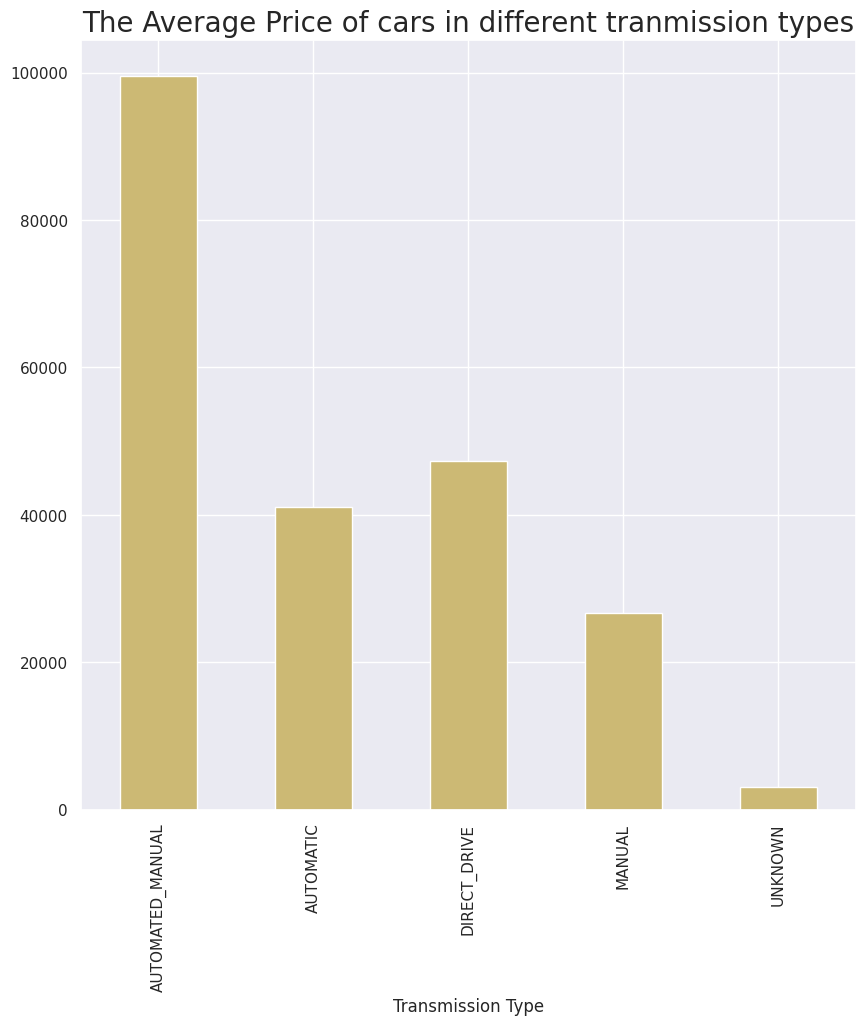

In [23]:
plt.figure(figsize = (10, 10))
data.groupby('Transmission Type')['MSRP'].mean().plot(kind = 'bar', color = 'y')
plt.title("The Average Price of cars in different tranmission types", fontsize = 20)
plt.show()

### Grouping on the basis of Make with 'MSRP' values

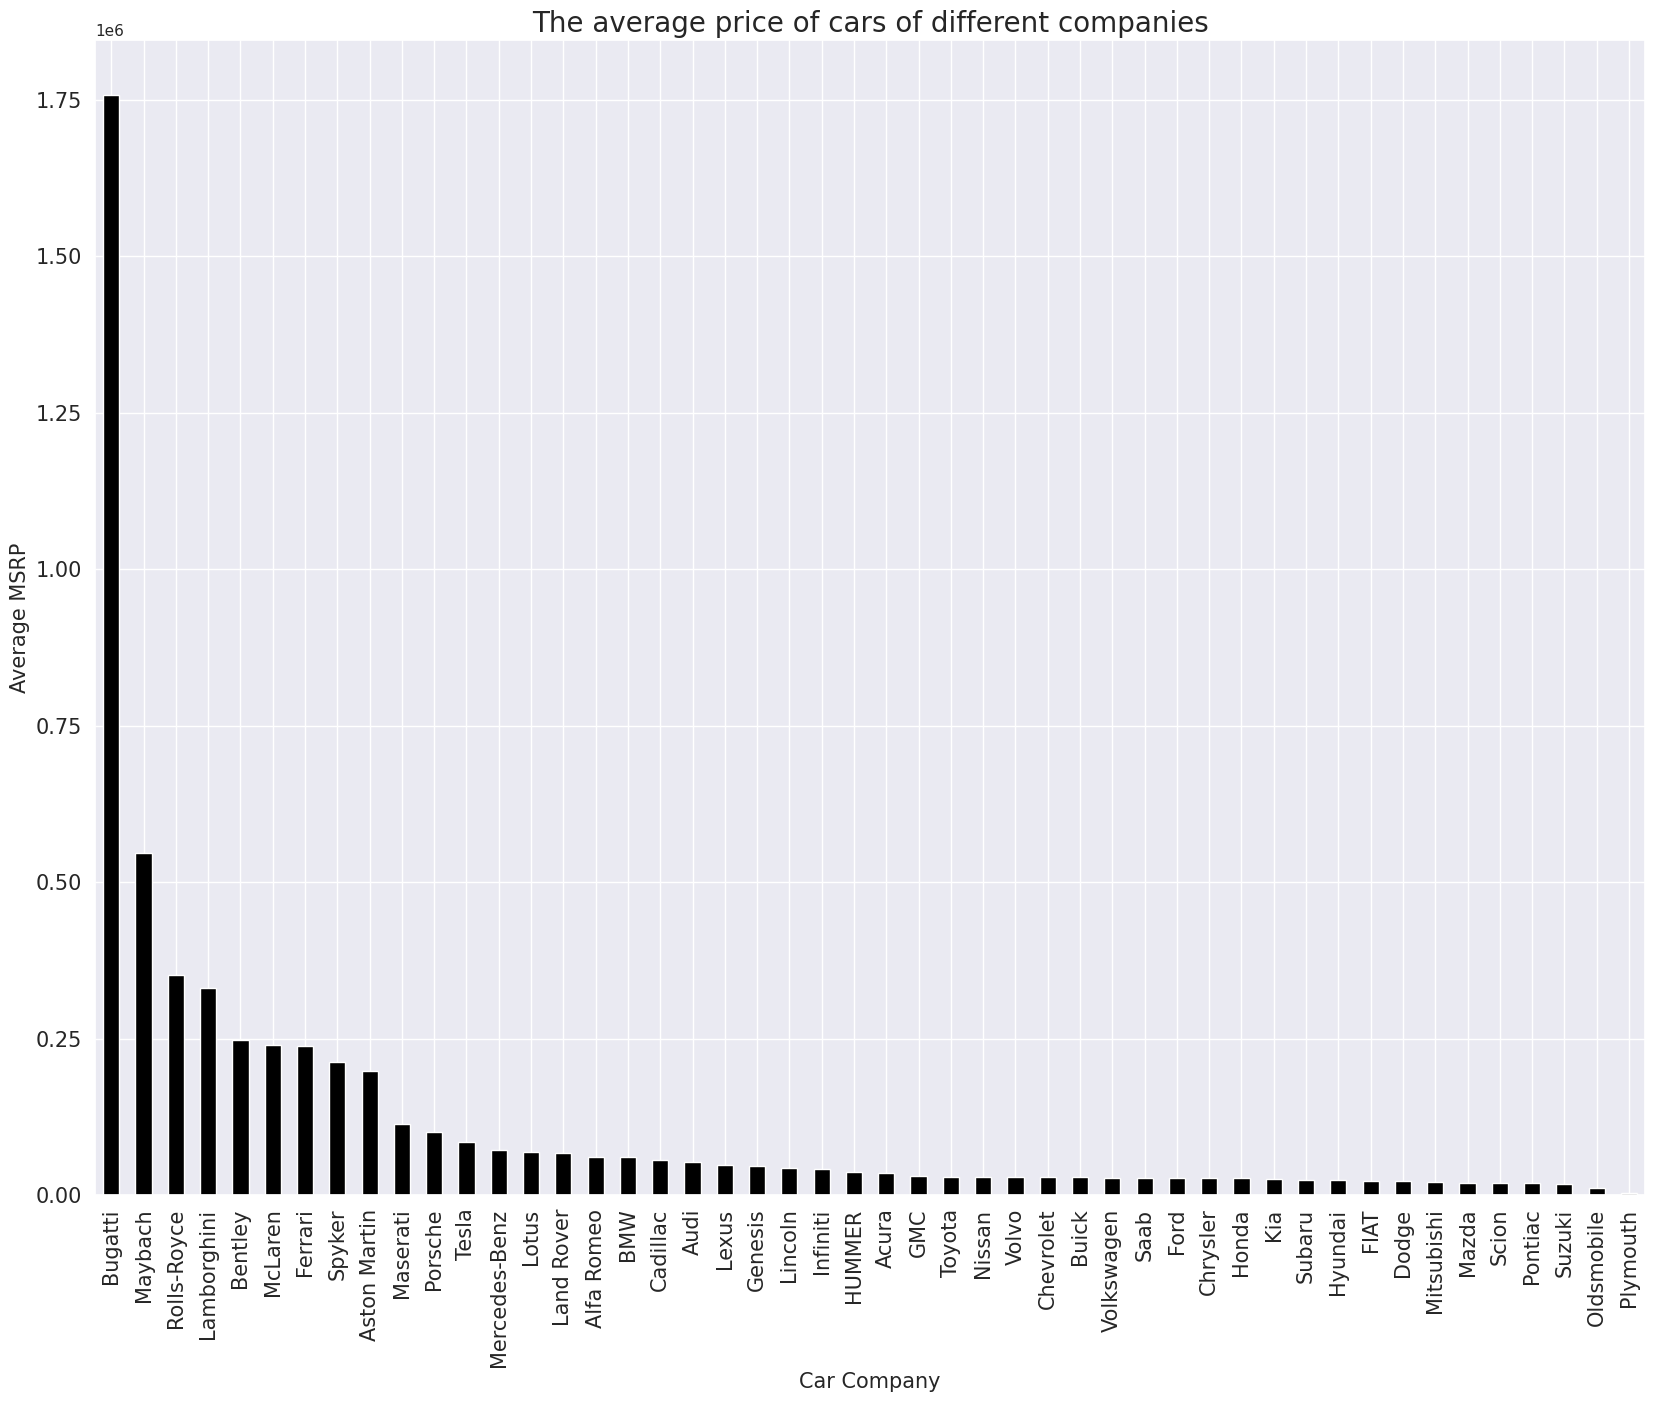

In [24]:
data['MSRP'] = pd.to_numeric(data['MSRP'], errors='coerce')

# Plot the data
plt.figure(figsize=(20, 15))
data.groupby('Make')['MSRP'].mean().sort_values(ascending=False).plot(kind='bar', fontsize=15, color='black')
plt.title("The average price of cars of different companies", fontsize=20)
plt.xlabel("Car Company", fontsize=15)
plt.ylabel("Average MSRP", fontsize=15)
plt.show()

### Scatterplot between 'highway MPG' and 'city mpg'

In [25]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

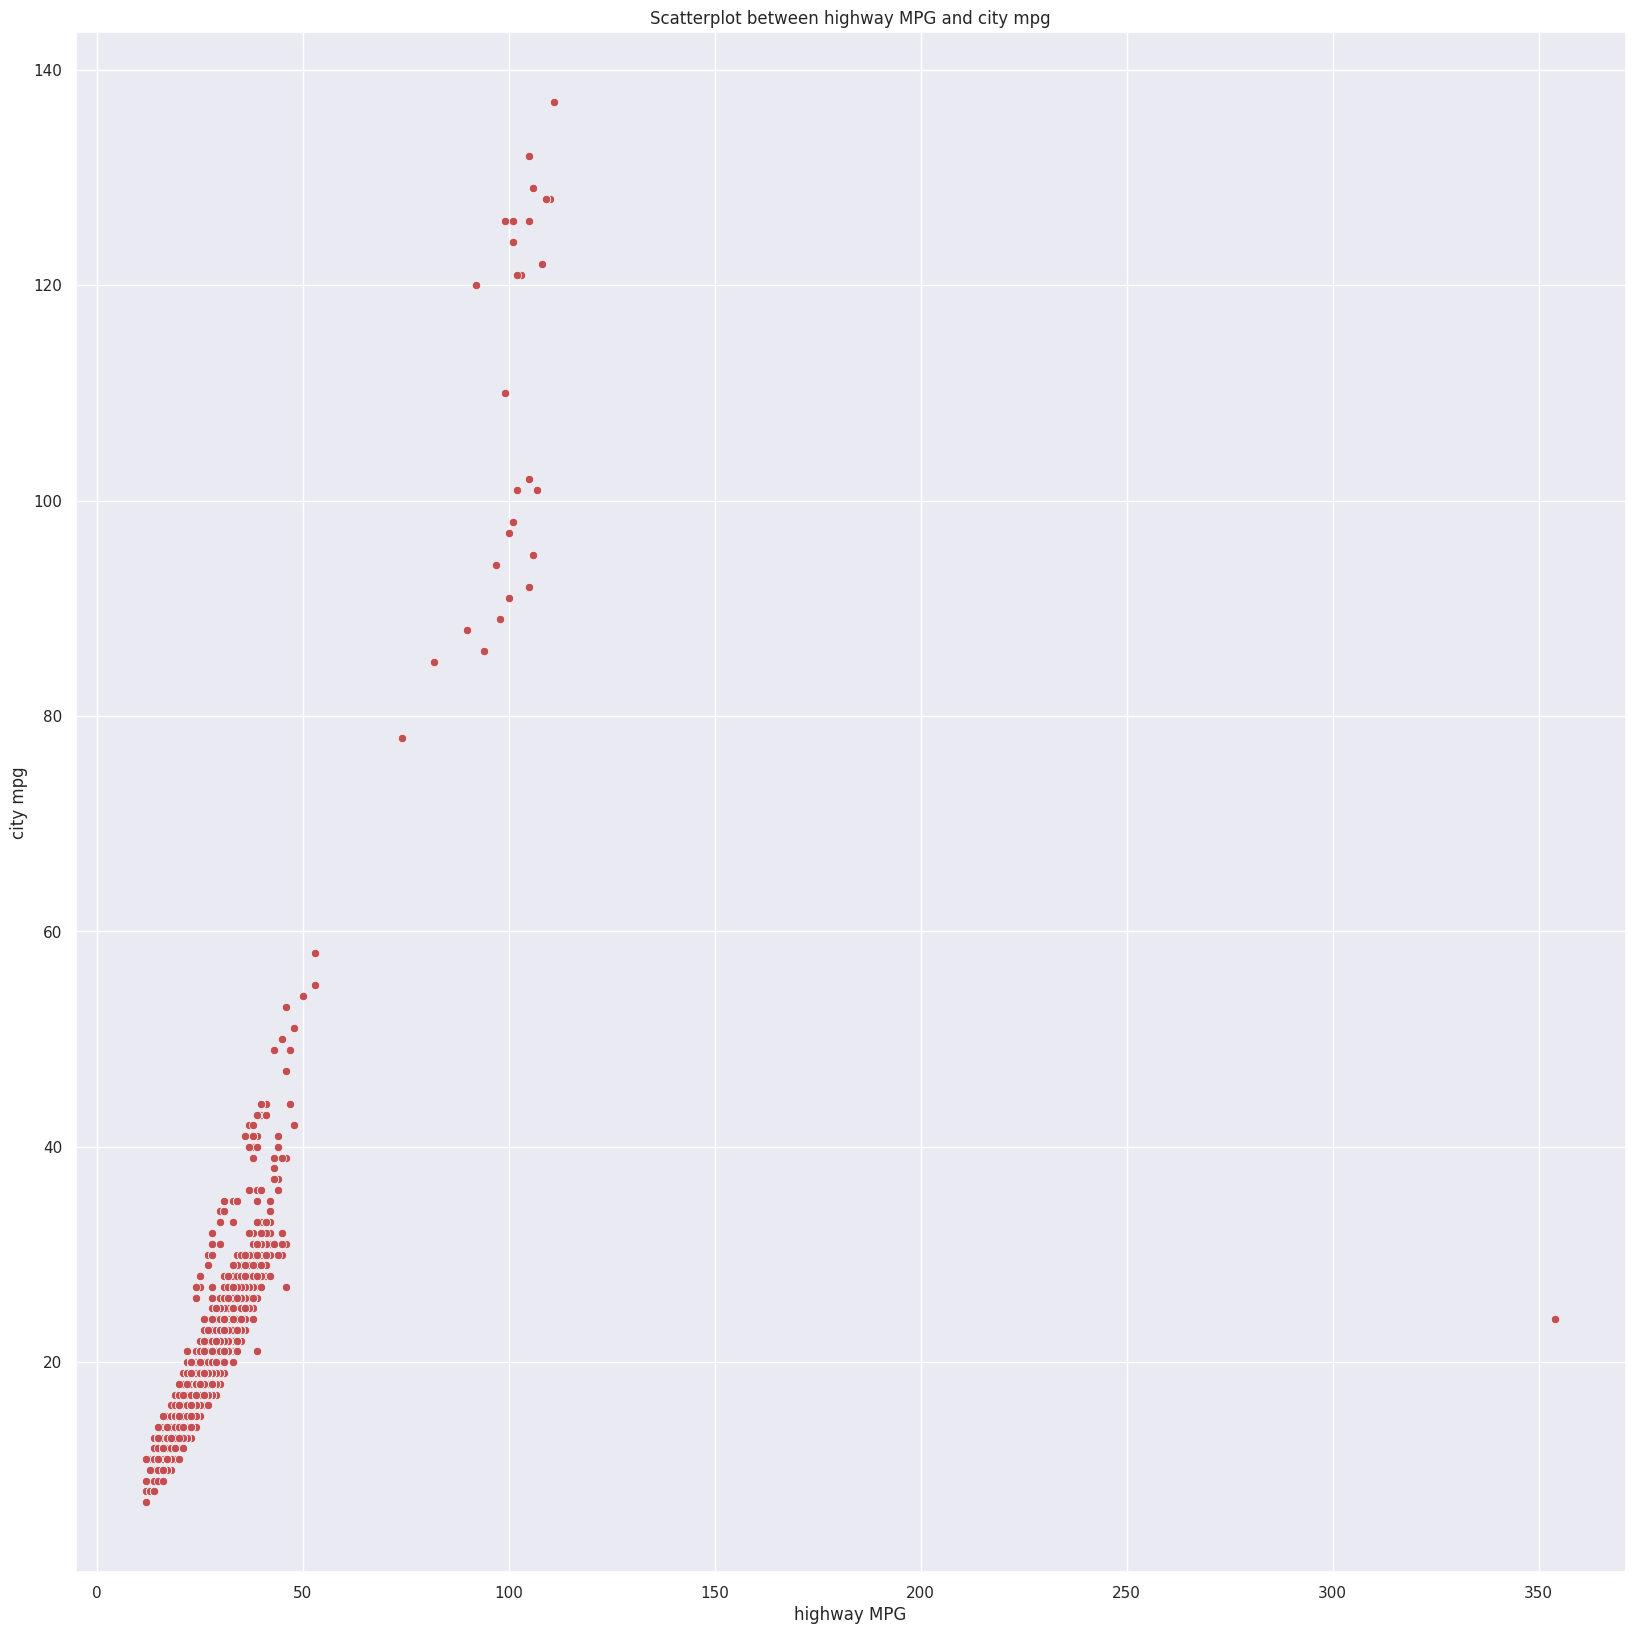

In [26]:
sns.scatterplot(x = 'highway MPG', y = 'city mpg', data = data, color = 'r')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

In [27]:
data[data['highway MPG'] > 350]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


In [28]:
data = data[data['highway MPG'] < 350]

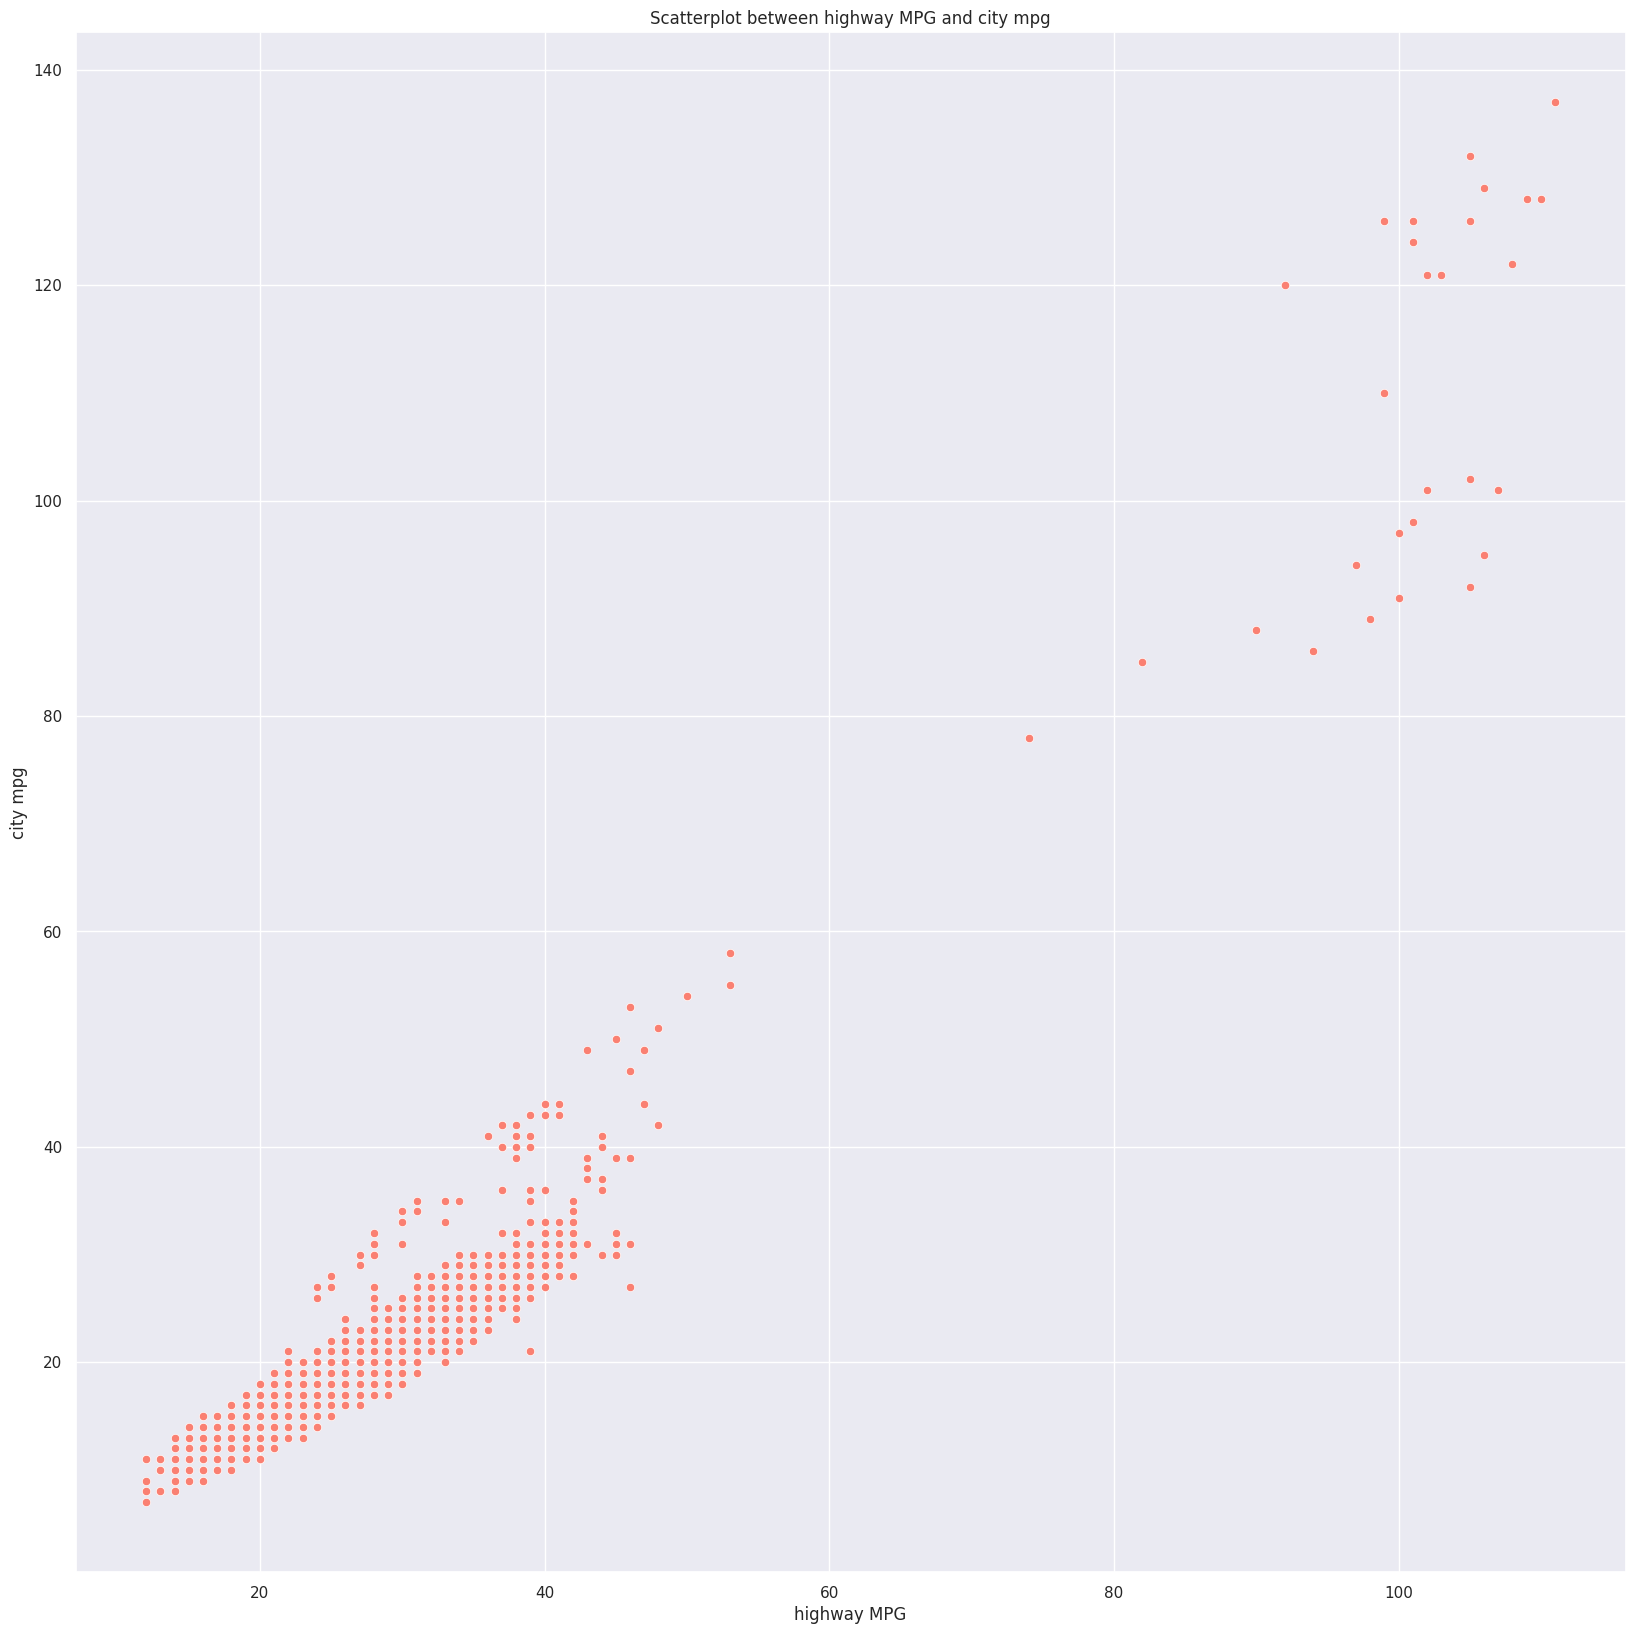

In [29]:
sns.scatterplot(x = 'highway MPG', y ='city mpg', data = data, color = 'salmon')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

In [30]:
data['Market Category'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

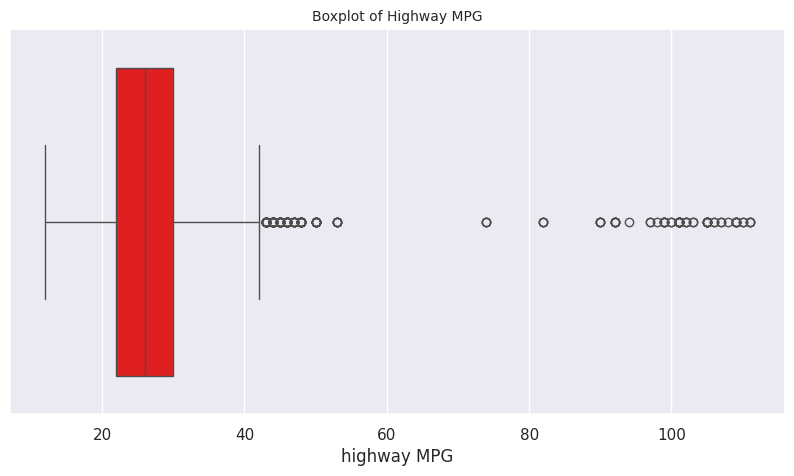

In [31]:
# Set the figure size before creating the seaborn plot
plt.figure(figsize=(10, 5))

# Create the boxplot
sns.boxplot(x='highway MPG', data=data, color='red')

# Add a title
plt.title("Boxplot of Highway MPG", fontsize=10)

# Show the plot
plt.show()

In [32]:
for i in range(90, 100):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['highway MPG'], i)))

The 90.0th percentile value is 35.00
The 91.0th percentile value is 36.00
The 92.0th percentile value is 36.00
The 93.0th percentile value is 37.00
The 94.0th percentile value is 37.00
The 95.0th percentile value is 38.00
The 96.0th percentile value is 39.00
The 97.0th percentile value is 40.00
The 98.0th percentile value is 42.00
The 99.0th percentile value is 46.00


In [33]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['highway MPG'], i)))

The 99.0th percentile value is 46.00
The 99.1th percentile value is 46.00
The 99.2th percentile value is 48.00
The 99.3th percentile value is 48.00
The 99.4th percentile value is 50.00
The 99.5th percentile value is 85.52
The 99.6th percentile value is 97.35
The 99.7th percentile value is 101.00
The 99.8th percentile value is 103.35
The 99.9th percentile value is 107.09


In [34]:
data = data[data['highway MPG'] < 60]

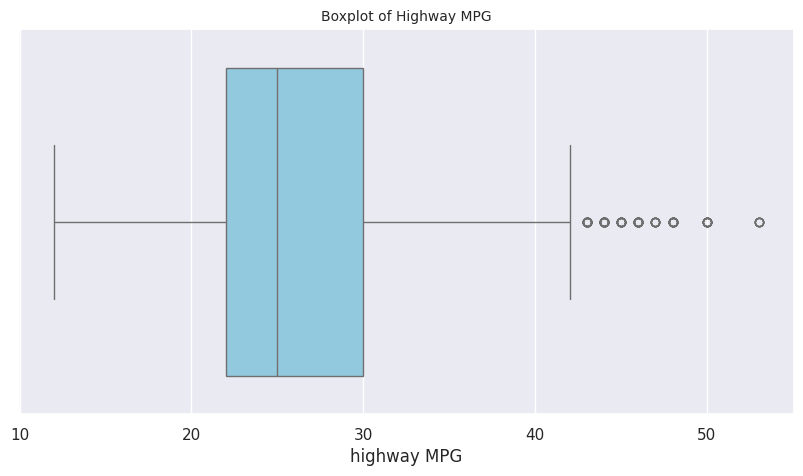

In [35]:

# Set the figure size before creating the seaborn plot
plt.figure(figsize=(10, 5))

# Create the boxplot
sns.boxplot(x='highway MPG', data=data, color='skyblue')

# Add a title
plt.title("Boxplot of Highway MPG", fontsize=10)

# Show the plot
plt.show()

<Axes: xlabel='city mpg'>

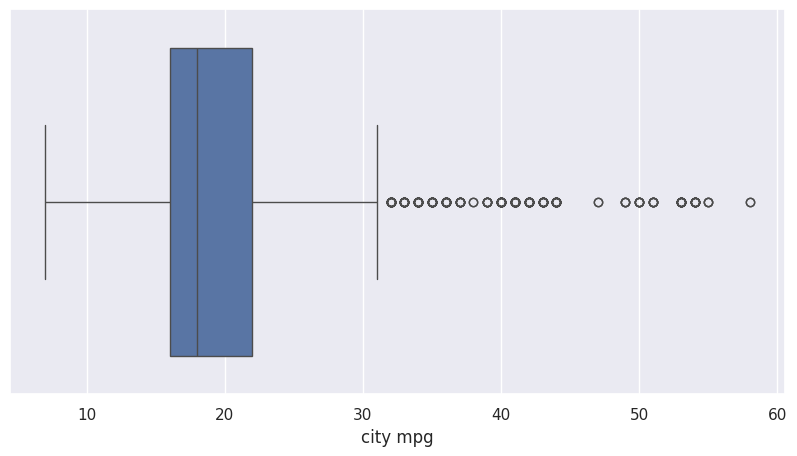

In [36]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'city mpg', data = data)


In [37]:
for i in range(90, 100):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['city mpg'], i)))

The 90.0th percentile value is 26.00
The 91.0th percentile value is 26.00
The 92.0th percentile value is 27.00
The 93.0th percentile value is 27.00
The 94.0th percentile value is 28.00
The 95.0th percentile value is 29.00
The 96.0th percentile value is 30.00
The 97.0th percentile value is 31.00
The 98.0th percentile value is 32.00
The 99.0th percentile value is 41.00


In [38]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['city mpg'], i)))

The 99.0th percentile value is 41.00
The 99.1th percentile value is 41.00
The 99.2th percentile value is 41.00
The 99.3th percentile value is 42.00
The 99.4th percentile value is 43.00
The 99.5th percentile value is 44.00
The 99.6th percentile value is 44.00
The 99.7th percentile value is 50.00
The 99.8th percentile value is 53.00
The 99.9th percentile value is 54.00


In [39]:

data = data[data['city mpg'] < 40]

<Axes: xlabel='city mpg'>

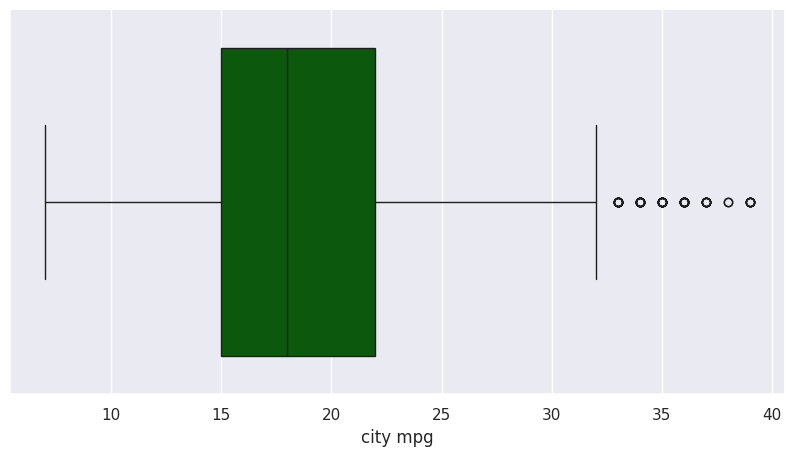

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'city mpg', data= data, color = 'darkgreen')

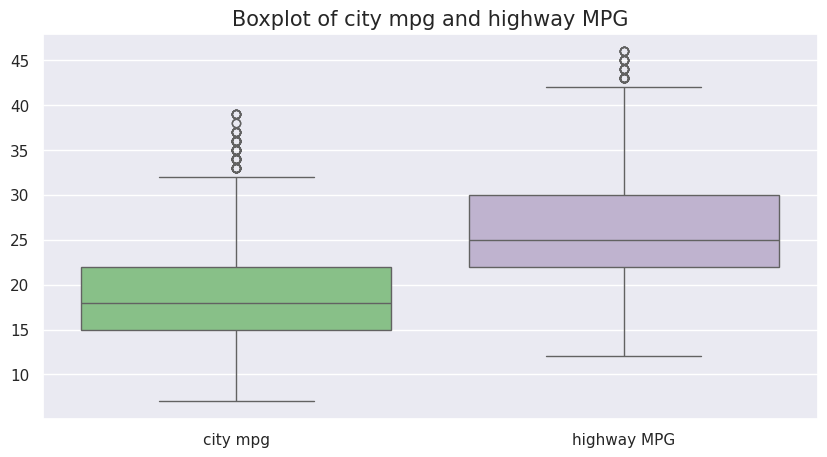

In [41]:
# Boxplot of 2 features 'city mpg' and 'highway MPG'
plt.figure(figsize = (10, 5))
sns.boxplot(data = data[['city mpg', 'highway MPG']], palette = 'Accent')
plt.title("Boxplot of city mpg and highway MPG", fontsize = 15)
plt.show()

<Axes: ylabel='Engine HP'>

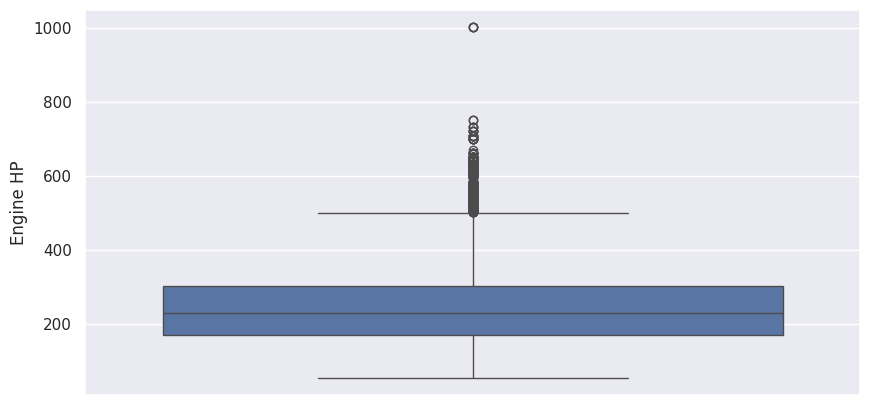

In [42]:
plt.figure(figsize = (10, 5))
sns.boxplot(data['Engine HP'])

In [43]:
data.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


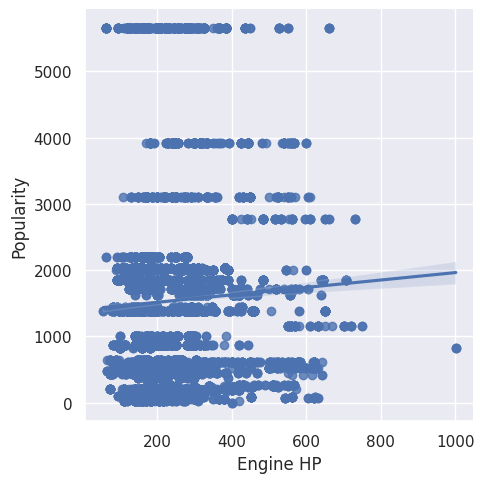

In [44]:
# lmplot between 'Engine HP' and 'Popularity'

sns.set(rc = {'figure.figsize': (20, 20)})
sns.lmplot(x = 'Engine HP', y = 'Popularity', data = data)

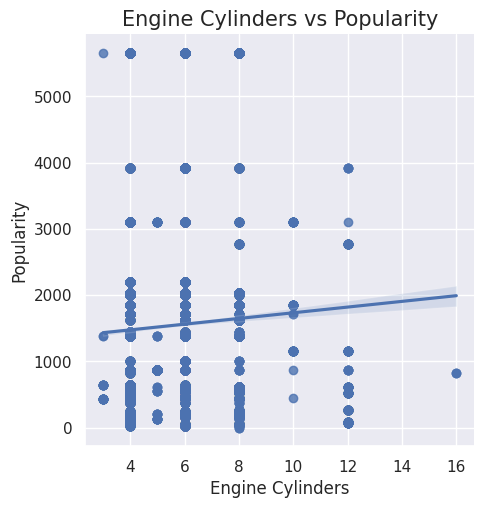

In [45]:
# lmplot between 'Engine Cylinders' and 'Popularity'
sns.lmplot(x = 'Engine Cylinders', y = 'Popularity', data = data)
plt.title("Engine Cylinders vs Popularity", fontsize = 15)
plt.show()



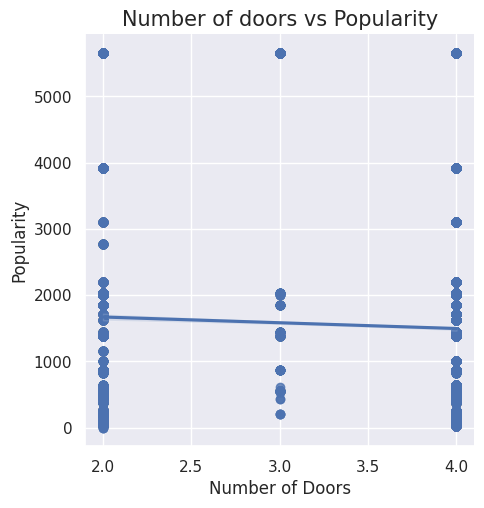

In [46]:
# lmplot between 'Number of Doors' and 'Popularity'
sns.lmplot(x = 'Number of Doors', y = 'Popularity', data = data)
plt.title("Number of doors vs Popularity", fontsize = 15)
plt.show()


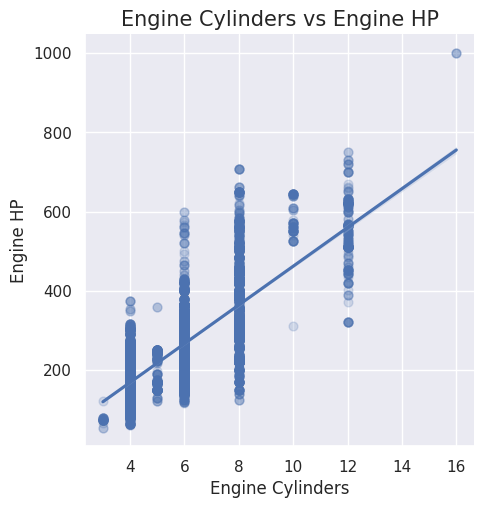

In [47]:
# lmplot between 'Engine Cylinders' and 'Engine HP'
sns.lmplot(x = 'Engine Cylinders', y = 'Engine HP', scatter_kws = {"s": 40, "alpha": 0.2}, data = data)
plt.title("Engine Cylinders vs Engine HP", fontsize = 15)
plt.show()

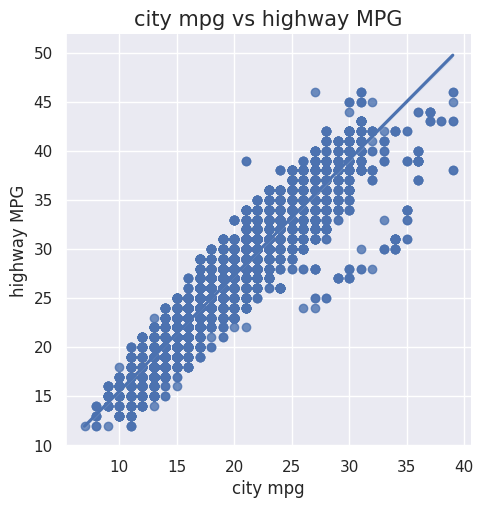

In [48]:
# lmplot between 'city mpg' and 'highway MPG'
sns.lmplot(x = 'city mpg', y = 'highway MPG', data = data)
plt.title("city mpg vs highway MPG", fontsize = 15)
plt.show()

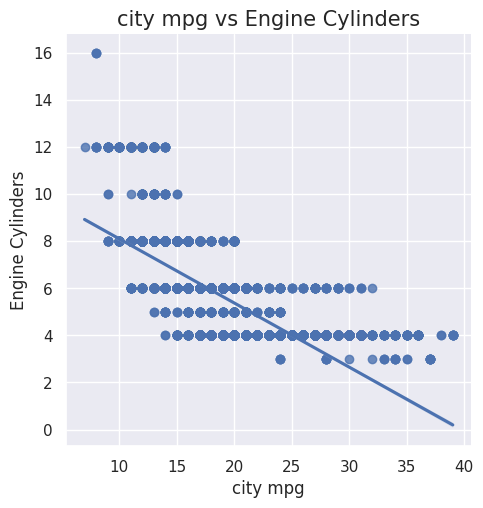

In [49]:
# lmplot between 'city mpg' and 'Engine Cylinders'
sns.lmplot(x = 'city mpg', y = 'Engine Cylinders', data = data)
plt.title("city mpg vs Engine Cylinders", fontsize = 15)
plt.show()

<Axes: >

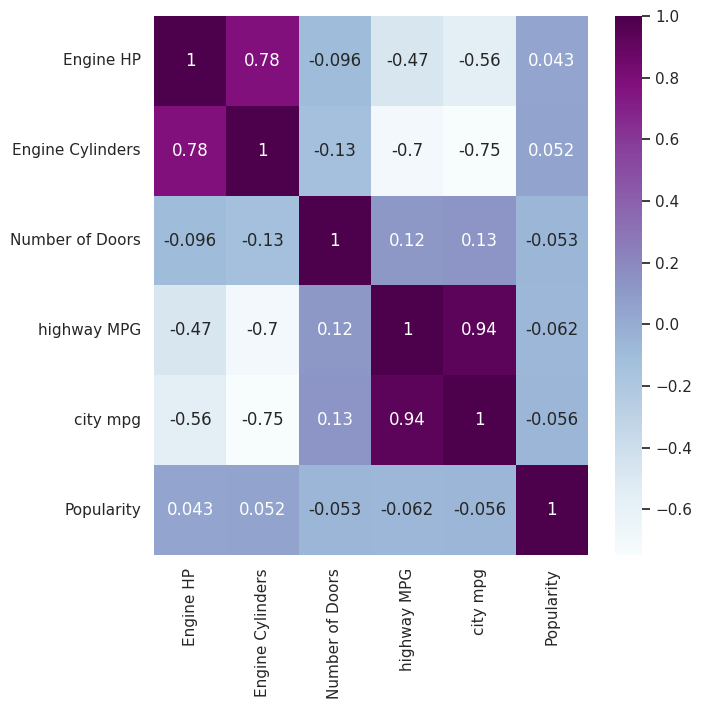

In [50]:
# Heatmap
plt.figure(figsize = (7, 7))
numeric_columns = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
heatmap_data = data[numeric_columns].corr()

sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)

In [51]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

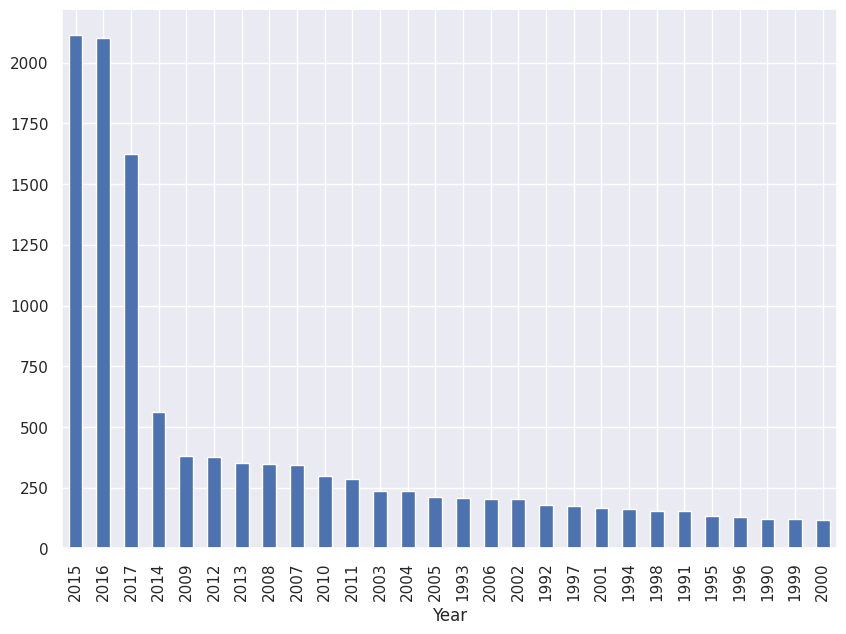

In [52]:
# Grouping on the basis of 'Year'
plt.figure(figsize = (10, 7))
data['Year'].value_counts().plot(kind='bar')
plt.show()

In [53]:
# Checking the NULL values
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              21
Engine Cylinders       20
Transmission Type       0
Driven_Wheels           0
Number of Doors         1
Market Category      3737
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [54]:
data['Number of Doors'].median()

4.0

In [55]:
data['Number of Doors'].fillna(4.0, inplace = True)

In [56]:
data['Number of Doors'].isnull().sum()

0

In [57]:
# Creating a new column
data['Present Year'] = 2021

In [58]:
data.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Present Year
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,2021


In [59]:

data['Years Of Manufacture'] = data['Present Year'] - data['Year']

In [60]:
data.drop(['Present Year'], inplace = True, axis = 1)

In [61]:
data.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Years Of Manufacture
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,10


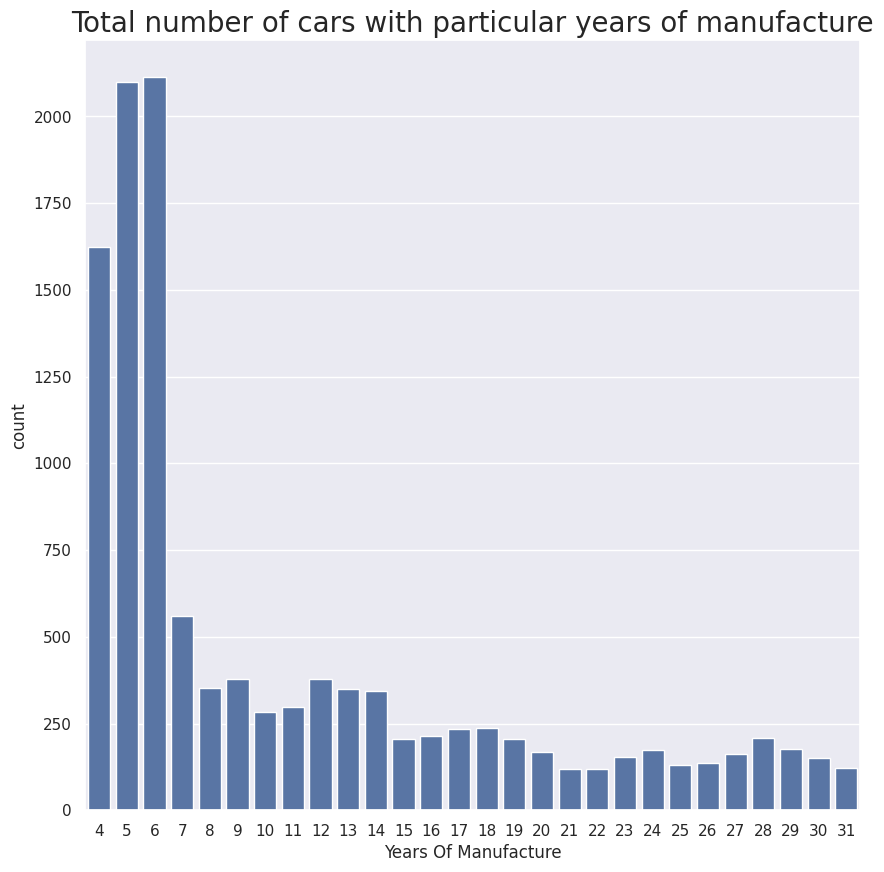

In [62]:
# Plotting the barplot of 'Years of Manufacture'
plt.figure(figsize=(10,10))
sns.barplot(y = data['Years Of Manufacture'].value_counts(), x = data['Years Of Manufacture'].value_counts().index)
plt.title("Total number of cars with particular years of manufacture", fontsize = 20)
plt.show()

In [63]:
# Unique values in 'Engine Fuel Type'
data['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'flex-fuel (premium unleaded recommended/E85)',
       'natural gas', 'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [64]:
type("data['Engine Fuel Type'].mode()")

str

In [65]:
data['Engine Fuel Type'].fillna("data['Engine Fuel Type'].mode()", inplace = True)

In [66]:
data['Engine Fuel Type'].isnull().sum()

0

In [67]:
data.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine Fuel Type           0
Engine HP                 21
Engine Cylinders          20
Transmission Type          0
Driven_Wheels              0
Number of Doors            0
Market Category         3737
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Years Of Manufacture       0
dtype: int64

In [68]:
data['Engine HP'].mean()

250.75316672372475

In [69]:
data['Engine HP'].median()

230.0

In [70]:
data['Engine HP'].fillna(data['Engine HP'].median(),inplace = True)

In [71]:
data['Engine HP'].isnull().sum()

0

In [72]:
data['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12., 10.,  3., nan, 16.])

In [73]:
data['Engine Cylinders'].fillna(4, inplace = True)

In [74]:

data.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine Fuel Type           0
Engine HP                  0
Engine Cylinders           0
Transmission Type          0
Driven_Wheels              0
Number of Doors            0
Market Category         3737
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Years Of Manufacture       0
dtype: int64

In [75]:
data.drop(['Market Category'], inplace  = True, axis = 1)

In [76]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
Years Of Manufacture    0
dtype: int64

In [77]:
data.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Years Of Manufacture
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,10


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11705 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  11705 non-null  object 
 1   Model                 11705 non-null  object 
 2   Year                  11705 non-null  int64  
 3   Engine Fuel Type      11705 non-null  object 
 4   Engine HP             11705 non-null  float64
 5   Engine Cylinders      11705 non-null  float64
 6   Transmission Type     11705 non-null  object 
 7   Driven_Wheels         11705 non-null  object 
 8   Number of Doors       11705 non-null  float64
 9   Vehicle Size          11705 non-null  object 
 10  Vehicle Style         11705 non-null  object 
 11  highway MPG           11705 non-null  int64  
 12  city mpg              11705 non-null  int64  
 13  Popularity            11705 non-null  int64  
 14  MSRP                  11705 non-null  int64  
 15  Years Of Manufacture  11

<Axes: xlabel='MSRP', ylabel='Density'>

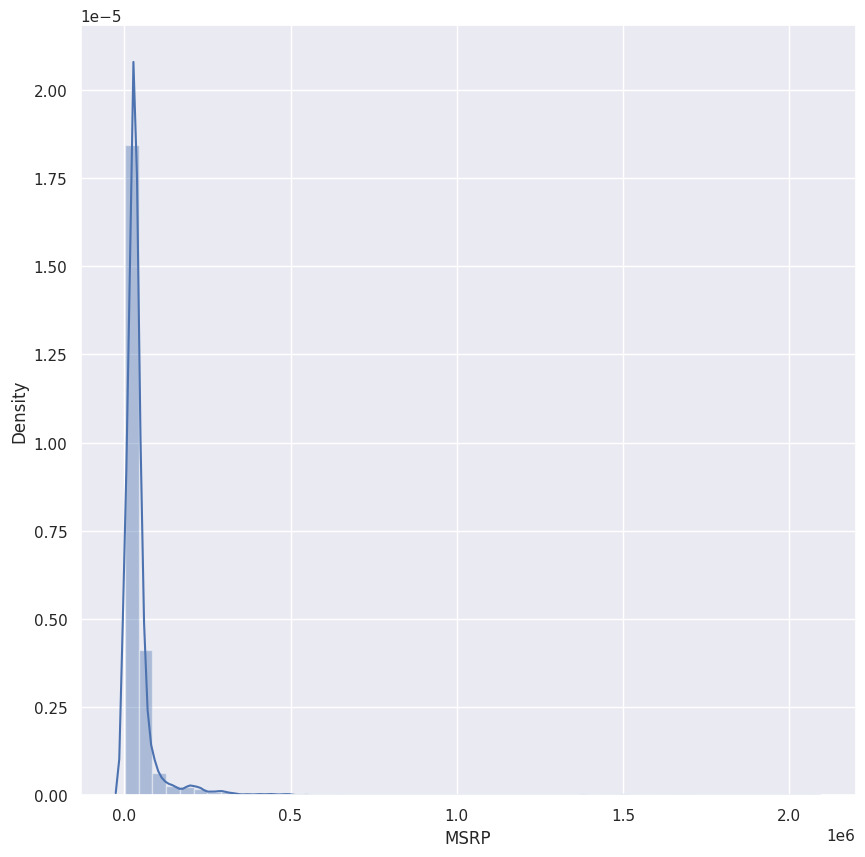

In [79]:
plt.figure(figsize=(10,10))
sns.distplot(data['MSRP'])

In [80]:
data['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [81]:
data['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [82]:
# Manipulation of Data and modelbulding
shuffled_data = shuffle(data, random_state = 100)
X = shuffled_data.drop(['MSRP'], axis = 1)
y = shuffled_data['MSRP']


In [83]:
X.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
10070,Pontiac,Sunbird,1994,regular unleaded,110.0,4.0,MANUAL,front wheel drive,4.0,Compact,Sedan,32,22,210,27
4342,Ford,Expedition,2017,regular unleaded,365.0,6.0,AUTOMATIC,four wheel drive,4.0,Large,4dr SUV,20,15,5657,4


In [84]:
y.head(5)

10070     2000
4342     62860
8749     19757
6681     30920
8064      2000
Name: MSRP, dtype: int64

In [85]:
# Dividing the data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [86]:
print("The size of the input train data is: {}".format(X_train.shape))
print("The size of the output train data is: {}".format(y_train.shape))
print("The size of the input test data is: {}".format(X_test.shape))
print("The size of the output test data is: {}".format(y_test.shape))

The size of the input train data is: (9364, 15)
The size of the output train data is: (9364,)
The size of the input test data is: (2341, 15)
The size of the output test data is: (2341,)


In [87]:
# Encoding the data
encoder = TargetEncoder(cols = 'Year')


In [88]:

encoder.fit(X_train['Year'], y_train.to_frame()['MSRP'] )

TargetEncoder(cols=['Year'])

In [89]:
X_train['Year'] = encoder.transform(X_train['Year'])

In [90]:
X_test['Year'] = encoder.transform(X_test['Year'])

In [91]:
X_train.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1354,Oldsmobile,Alero,36784.190660,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,18
896,Saab,900,2558.613101,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,24
2635,Chevrolet,C/K 1500 Series,2558.613101,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,24
11165,Aston Martin,V8 Vantage,46953.929157,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,6
2554,Honda,Civic,46953.929157,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,6


In [92]:
encoder = TargetEncoder(cols = 'Model')
encoder.fit(X_train['Model'], y_train.to_frame()['MSRP'])
X_train['Model'] = encoder.transform(X_train['Model'])
X_test['Model'] = encoder.transform(X_test['Model'])

In [93]:
X_train.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1354,Oldsmobile,30176.543012,36784.190660,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,18
896,Saab,25245.937696,2558.613101,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,24
2635,Chevrolet,5061.892819,2558.613101,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,24
11165,Aston Martin,97860.899828,46953.929157,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,6
2554,Honda,22687.787683,46953.929157,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,6


In [94]:
encoder = TargetEncoder(cols = 'Make')
encoder.fit(X_train['Make'], y_train.to_frame()['MSRP'])
X_train['Make'] = encoder.transform(X_train['Make'])
X_test['Make'] = encoder.transform(X_test['Make'])

In [95]:
X_train.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1354,10812.757938,30176.543012,36784.190660,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,18
896,28423.023983,25245.937696,2558.613101,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,24
2635,28230.392090,5061.892819,2558.613101,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,24
11165,196884.138144,97860.899828,46953.929157,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,6
2554,26660.798742,22687.787683,46953.929157,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,6


In [96]:
X_train["Engine Fuel Type"].unique()

array(['regular unleaded', 'premium unleaded (required)', 'diesel',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)',
       'flex-fuel (premium unleaded recommended/E85)',
       "data['Engine Fuel Type'].mode()", 'natural gas'], dtype=object)

In [97]:
# One Hot Encoding
encoder = OneHotEncoder()
encoder.fit(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_train = encoder.transform(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_test = encoder.transform(X_test[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])


In [98]:
X_train = pd.concat([X_train, one_hot_encoded_output_train], axis = 1)
X_test = pd.concat([X_test, one_hot_encoded_output_test], axis = 1)

In [99]:
X_train.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)
X_test.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)

In [100]:
X_train

,Make,Model,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Years Of Manufacture,...,Vehicle Style_7,Vehicle Style_8,Vehicle Style_9,Vehicle Style_10,Vehicle Style_11,Vehicle Style_12,Vehicle Style_13,Vehicle Style_14,Vehicle Style_15,Vehicle Style_16
1354,10812.757938,30176.543012,36784.190660,140.0,4.0,4.0,30,21,26,18,...,0,0,0,0,0,0,0,0,0,0
896,28423.023983,25245.937696,2558.613101,185.0,4.0,2.0,25,18,376,24,...,0,0,0,0,0,0,0,0,0,0
2635,28230.392090,5061.892819,2558.613101,200.0,6.0,2.0,18,14,1385,24,...,0,0,0,0,0,0,0,0,0,0
11165,196884.138144,97860.899828,46953.929157,430.0,8.0,2.0,19,13,259,6,...,0,0,0,0,0,0,0,0,0,0
2554,26660.798742,22687.787683,46953.929157,143.0,4.0,4.0,39,30,2202,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,102939.340973,35270.900843,2669.242559,236.0,4.0,2.0,24,15,1715,26,...,0,0,0,0,0,0,0,0,0,0
9906,25625.626145,30691.670902,51694.325658,138.0,4.0,4.0,30,23,1720,12,...,0,0,0,0,0,0,0,0,0,0
2034,26997.123955,31994.383611,2669.242559,205.0,8.0,2.0,16,12,5657,26,...,0,0,0,0,1,0,0,0,0,0
1456,243377.613504,92380.071791,56411.258064,500.0,8.0,4.0,15,10,520,13,...,0,0,0,0,0,0,0,0,0,0


In [101]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9364 entries, 1354 to 2564
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  9364 non-null   float64
 1   Model                 9364 non-null   float64
 2   Year                  9364 non-null   float64
 3   Engine HP             9364 non-null   float64
 4   Engine Cylinders      9364 non-null   float64
 5   Number of Doors       9364 non-null   float64
 6   highway MPG           9364 non-null   int64  
 7   city mpg              9364 non-null   int64  
 8   Popularity            9364 non-null   int64  
 9   Years Of Manufacture  9364 non-null   int64  
 10  Engine Fuel Type_1    9364 non-null   int64  
 11  Engine Fuel Type_2    9364 non-null   int64  
 12  Engine Fuel Type_3    9364 non-null   int64  
 13  Engine Fuel Type_4    9364 non-null   int64  
 14  Engine Fuel Type_5    9364 non-null   int64  
 15  Engine Fuel Type_6    9

In [102]:
# Standardization and Normalization of data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

In [103]:
error_mean_square = []
error_mean_absolute = []
error_r2_score = []

In [106]:
# Linear Regression
model = LinearRegression()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)



# Calculate performance metrics
print('MAE', mean_absolute_error(y_test,y_predict))
print('MSE', mean_squared_error(y_test,y_predict))
print('R2_score', r2_score(y_test,y_predict))


MAE 13241.526270824434
MSE 596516836.2686886
R2_score 0.766311872547586


In [107]:
error_mean_square.append(int(mean_absolute_error(y_test,y_predict)))
error_mean_absolute.append(int(mean_squared_error(y_test,y_predict)))
error_r2_score.append(int(r2_score(y_test,y_predict)))

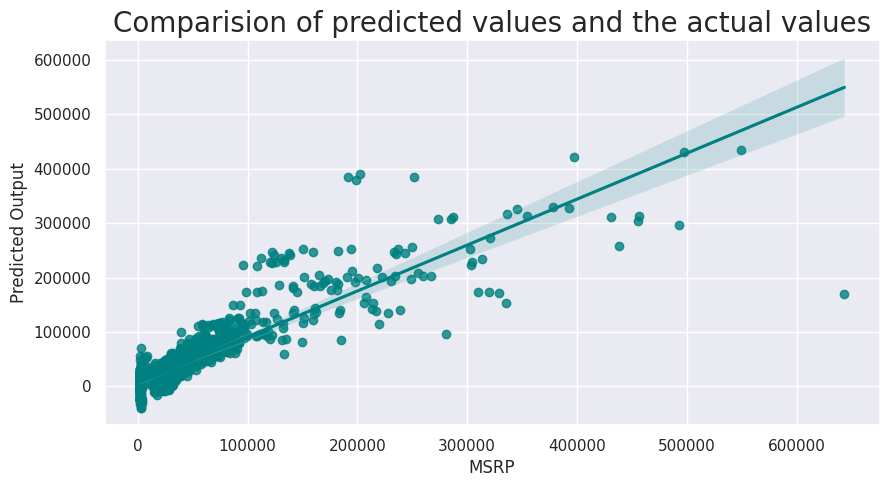

In [108]:
# Regplot for Linear Regression Output
plt.figure(figsize = (10, 5))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'teal', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [109]:
# Support Vector Regressor
model = SVR()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

# Calculate performance metrics
print('MAE', mean_absolute_error(y_test,y_predict))
print('MSE', mean_squared_error(y_test,y_predict))
print('R2_score', r2_score(y_test,y_predict))




MAE 22348.722583354032
MSE 2644288584.226795
R2_score -0.03591183034675827


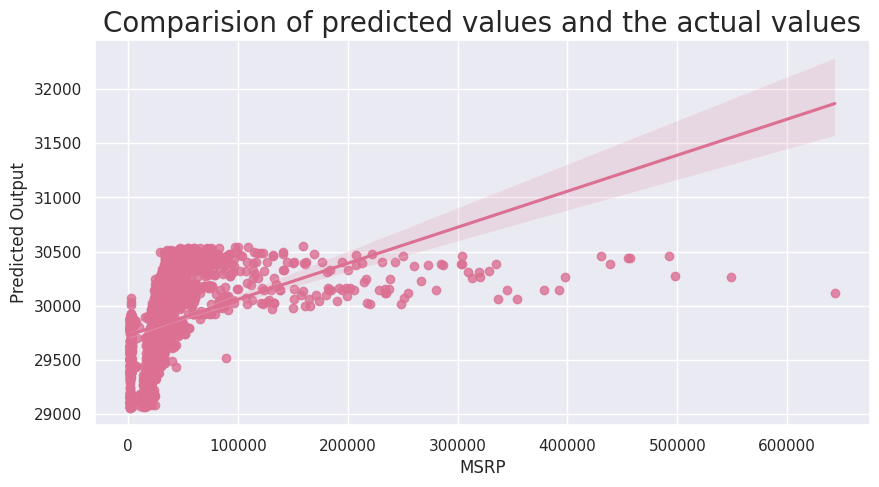

In [111]:
# Regplot for Support Vector Regressor
plt.figure(figsize = (10, 5))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'palevioletred', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [112]:
error_mean_square.append(int(mean_absolute_error(y_test,y_predict)))
error_mean_absolute.append(int(mean_squared_error(y_test,y_predict)))
error_r2_score.append(int(r2_score(y_test,y_predict)))

In [113]:
# Neighbors Regressor
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train_new,y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

# Calculate performance metrics
print('MAE', mean_absolute_error(y_test,y_predict))
print('MSE', mean_squared_error(y_test,y_predict))
print('R2_score', r2_score(y_test,y_predict))

MAE 4707.381674498078
MSE 226658292.132956
R2_score 0.9112056045367768


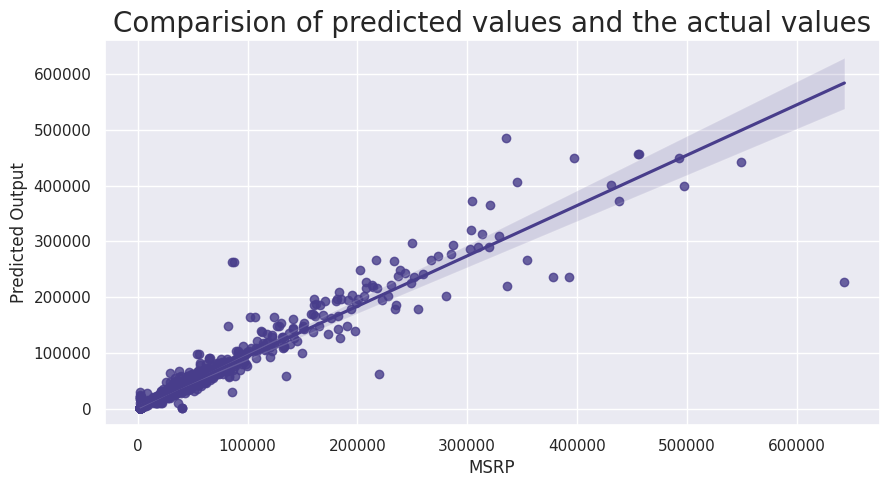

In [114]:
# Regplot for K - Neighbors Regressor
plt.figure(figsize = (10, 5))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'darkslateblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()


In [115]:
error_mean_square.append(int(mean_absolute_error(y_test,y_predict)))
error_mean_absolute.append(int(mean_squared_error(y_test,y_predict)))
error_r2_score.append(int(r2_score(y_test,y_predict)))

In [116]:
# PLS Regression
model = PLSRegression(n_components = 20)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

# Calculate performance metrics
print('MAE', mean_absolute_error(y_test,y_predict))
print('MSE', mean_squared_error(y_test,y_predict))
print('R2_score', r2_score(y_test,y_predict))

MAE 13252.258081742044
MSE 596713700.5264226
R2_score 0.7662347500977991


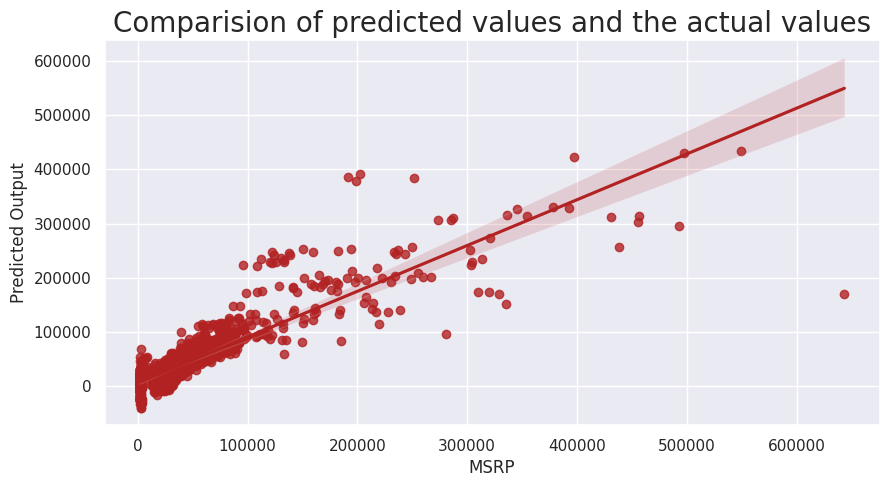

In [117]:
# Regplot for PLS Regression
plt.figure(figsize = (10, 5))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'firebrick', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [118]:
error_mean_square.append(int(mean_absolute_error(y_test,y_predict)))
error_mean_absolute.append(int(mean_squared_error(y_test,y_predict)))
error_r2_score.append(int(r2_score(y_test,y_predict)))

In [119]:
# Decision Tree Regressor
model = DecisionTreeRegressor(splitter = 'random')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

# Calculate performance metrics
print('MAE', mean_absolute_error(y_test,y_predict))
print('MSE', mean_squared_error(y_test,y_predict))
print('R2_score', r2_score(y_test,y_predict))


MAE 3308.2316719542264
MSE 118780937.02809635
R2_score 0.9534670388772798


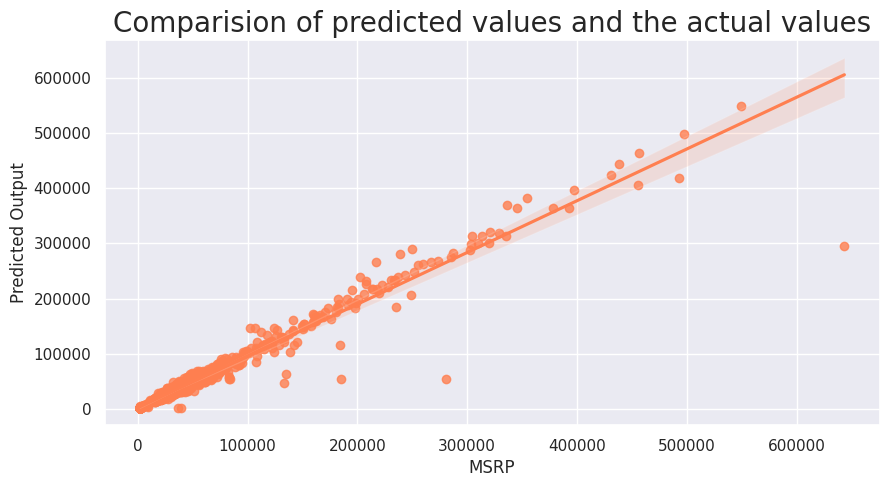

In [120]:
# Regplot for Decision Tree Regressor
plt.figure(figsize = (10, 5))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'coral', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [121]:
error_mean_square.append(int(mean_absolute_error(y_test,y_predict)))
error_mean_absolute.append(int(mean_squared_error(y_test,y_predict)))
error_r2_score.append(int(r2_score(y_test,y_predict)))

In [122]:
# Gradient Boosting Regressor
model = GradientBoostingRegressor()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

# Calculate performance metrics
print('MAE', mean_absolute_error(y_test,y_predict))
print('MSE', mean_squared_error(y_test,y_predict))
print('R2_score', r2_score(y_test,y_predict))


MAE 4361.717653011715
MSE 135229598.3233004
R2_score 0.9470232025536998


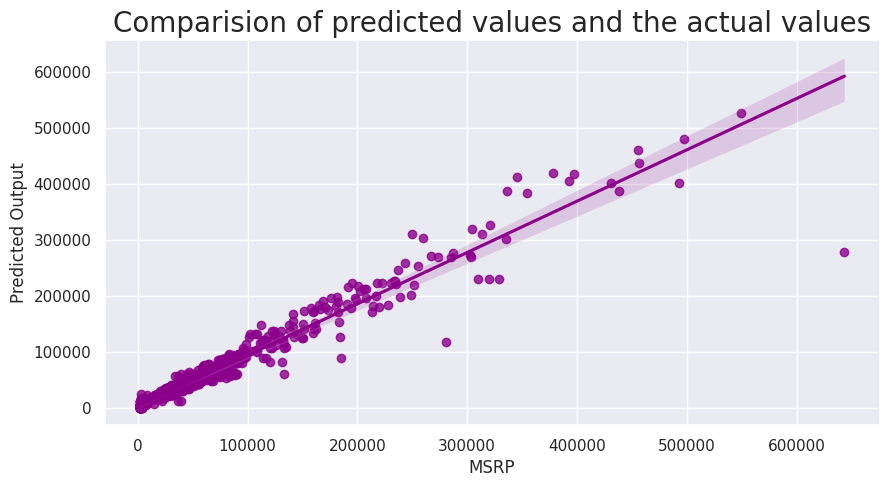

In [123]:
# Regplot of Gradient Boosting Regressor
plt.figure(figsize = (10, 5))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'darkmagenta', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [124]:
error_mean_square.append(int(mean_absolute_error(y_test,y_predict)))
error_mean_absolute.append(int(mean_squared_error(y_test,y_predict)))
error_r2_score.append(int(r2_score(y_test,y_predict)))

In [133]:
# MLP Regressor
model = MLPRegressor(hidden_layer_sizes = 50, alpha = 0.001, solver = 'lbfgs', learning_rate = 'adaptive')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

# Calculate performance metrics
print('MAE', mean_absolute_error(y_test,y_predict))
print('MSE', mean_squared_error(y_test,y_predict))
print('R2_score', r2_score(y_test,y_predict))


MAE 4789.212254883852
MSE 133907645.0470291
R2_score 0.9475410836375662


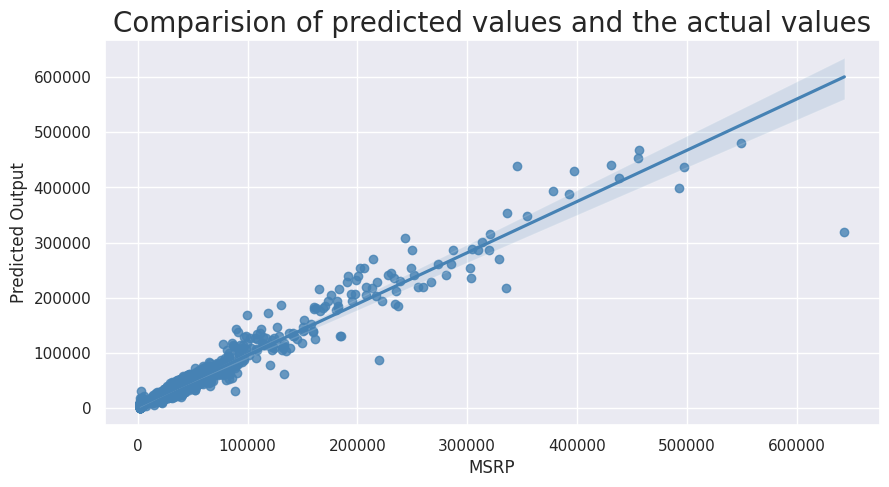

In [126]:
# Regplot of MLP Regressor
plt.figure(figsize = (10, 5))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'steelblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [134]:

# Define a function to evaluate the model and return metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

# Initialize an empty list to store the results
results = []

# List of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Support Vector Regressor', SVR()),
    ("Decision Tree Regressor", DecisionTreeRegressor(splitter='random')),
    ("KNeighbors Regressor", KNeighborsRegressor(n_neighbors=2)),
    ('PLS Regression', PLSRegression(n_components=2)),  # Adjusted n_components to avoid errors
    ('Gradient Boosting Regressor', GradientBoostingRegressor()),
    ("MLP Regressor", MLPRegressor(hidden_layer_sizes=(50,), alpha=0.001, solver='lbfgs', learning_rate='adaptive'))
]

# Evaluate each model and store the results
for model_name, model in models:
    try:
        mae, mse, r2, = evaluate_model(model, X_train, y_train, X_test, y_test)
        results.append({
            "Model": model_name,
            "MAE": mae,
            "MSE": mse,
            "R2": r2,
        })
    except Exception as e:
        print(f"Error evaluating model {model_name}: {e}")

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

                         Model           MAE           MSE        R2
0            Linear Regression  13253.657420  5.967248e+08  0.766230
1     Support Vector Regressor  22363.459816  2.637317e+09 -0.033181
2      Decision Tree Regressor   3489.099179  1.594201e+08  0.937546
3         KNeighbors Regressor   4369.467962  2.056551e+08  0.919434
4               PLS Regression  14293.287989  5.871646e+08  0.769976
5  Gradient Boosting Regressor   4357.803046  1.356526e+08  0.946857
6                MLP Regressor  11779.441192  5.908976e+08  0.768513


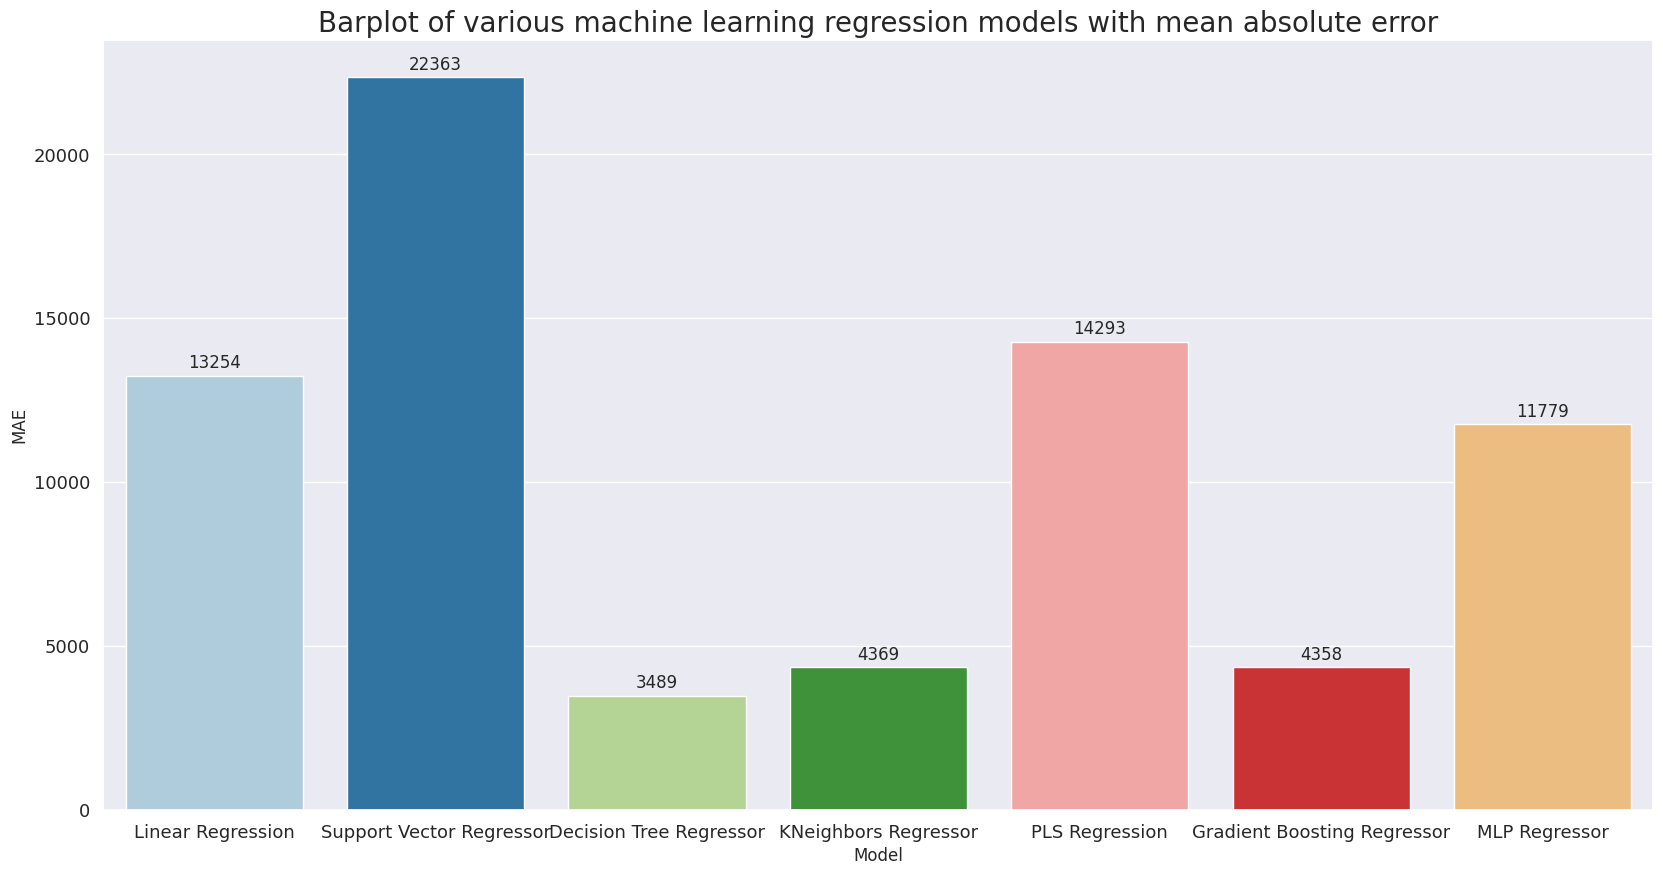

In [138]:
# Barplot of machine learning models MAE, MSE, R2_score
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = results_df, x = 'Model', y = 'MAE', palette = 'Paired')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean absolute error", fontsize = 20)
plt.show()



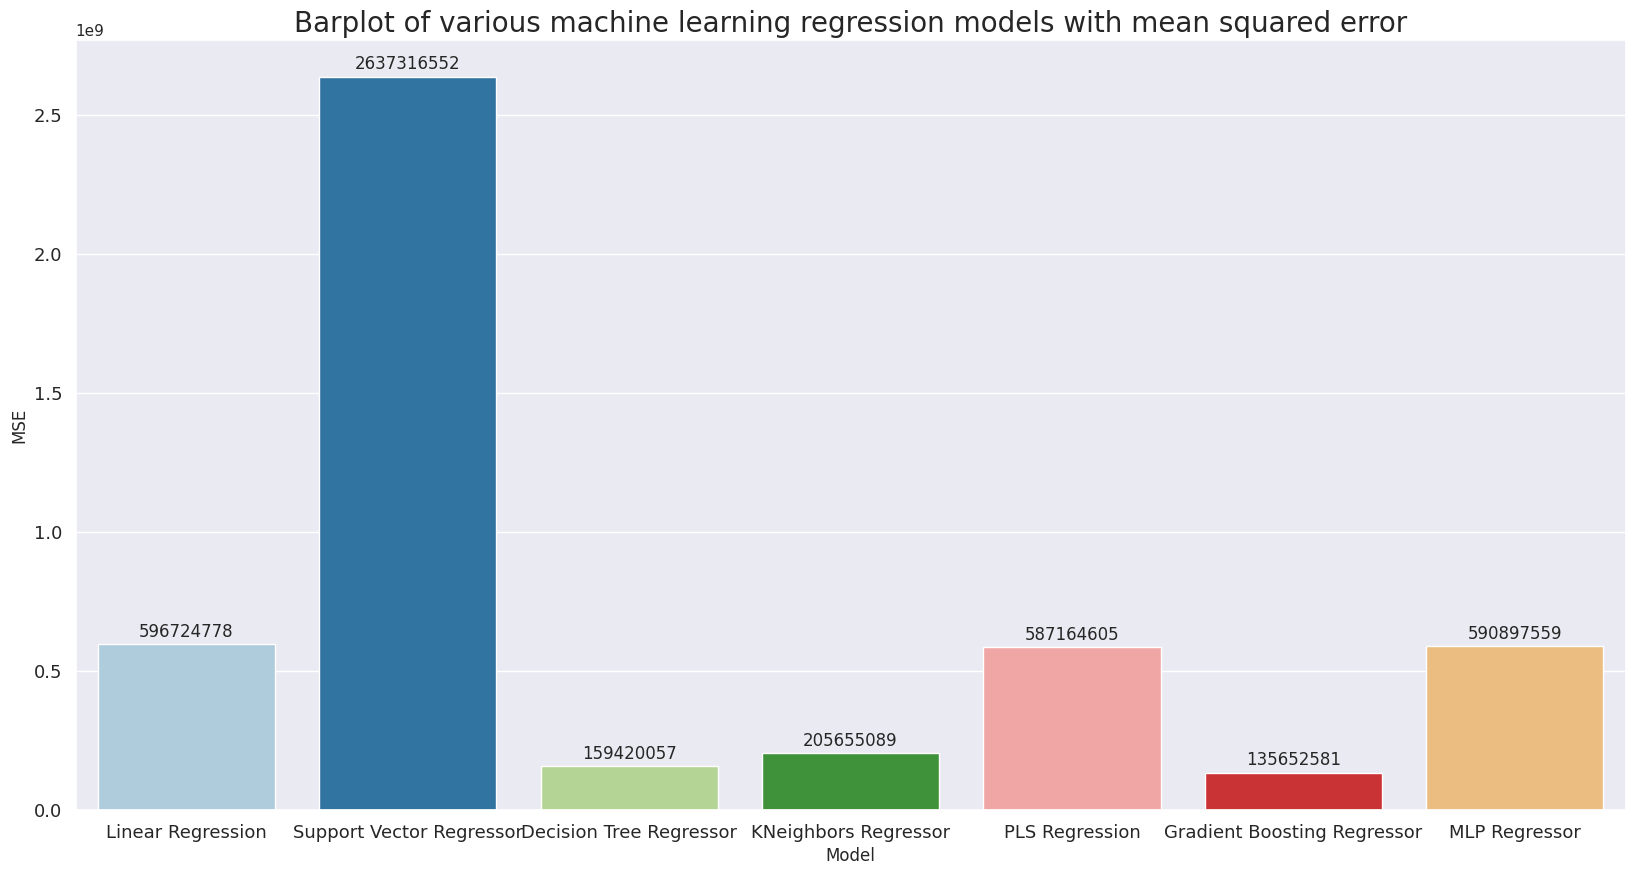

In [141]:
# Barplot of machine learning models MAE, MSE, R2_score
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = results_df, x = 'Model', y = 'MSE', palette = 'Paired')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean squared error", fontsize = 20)
plt.show()

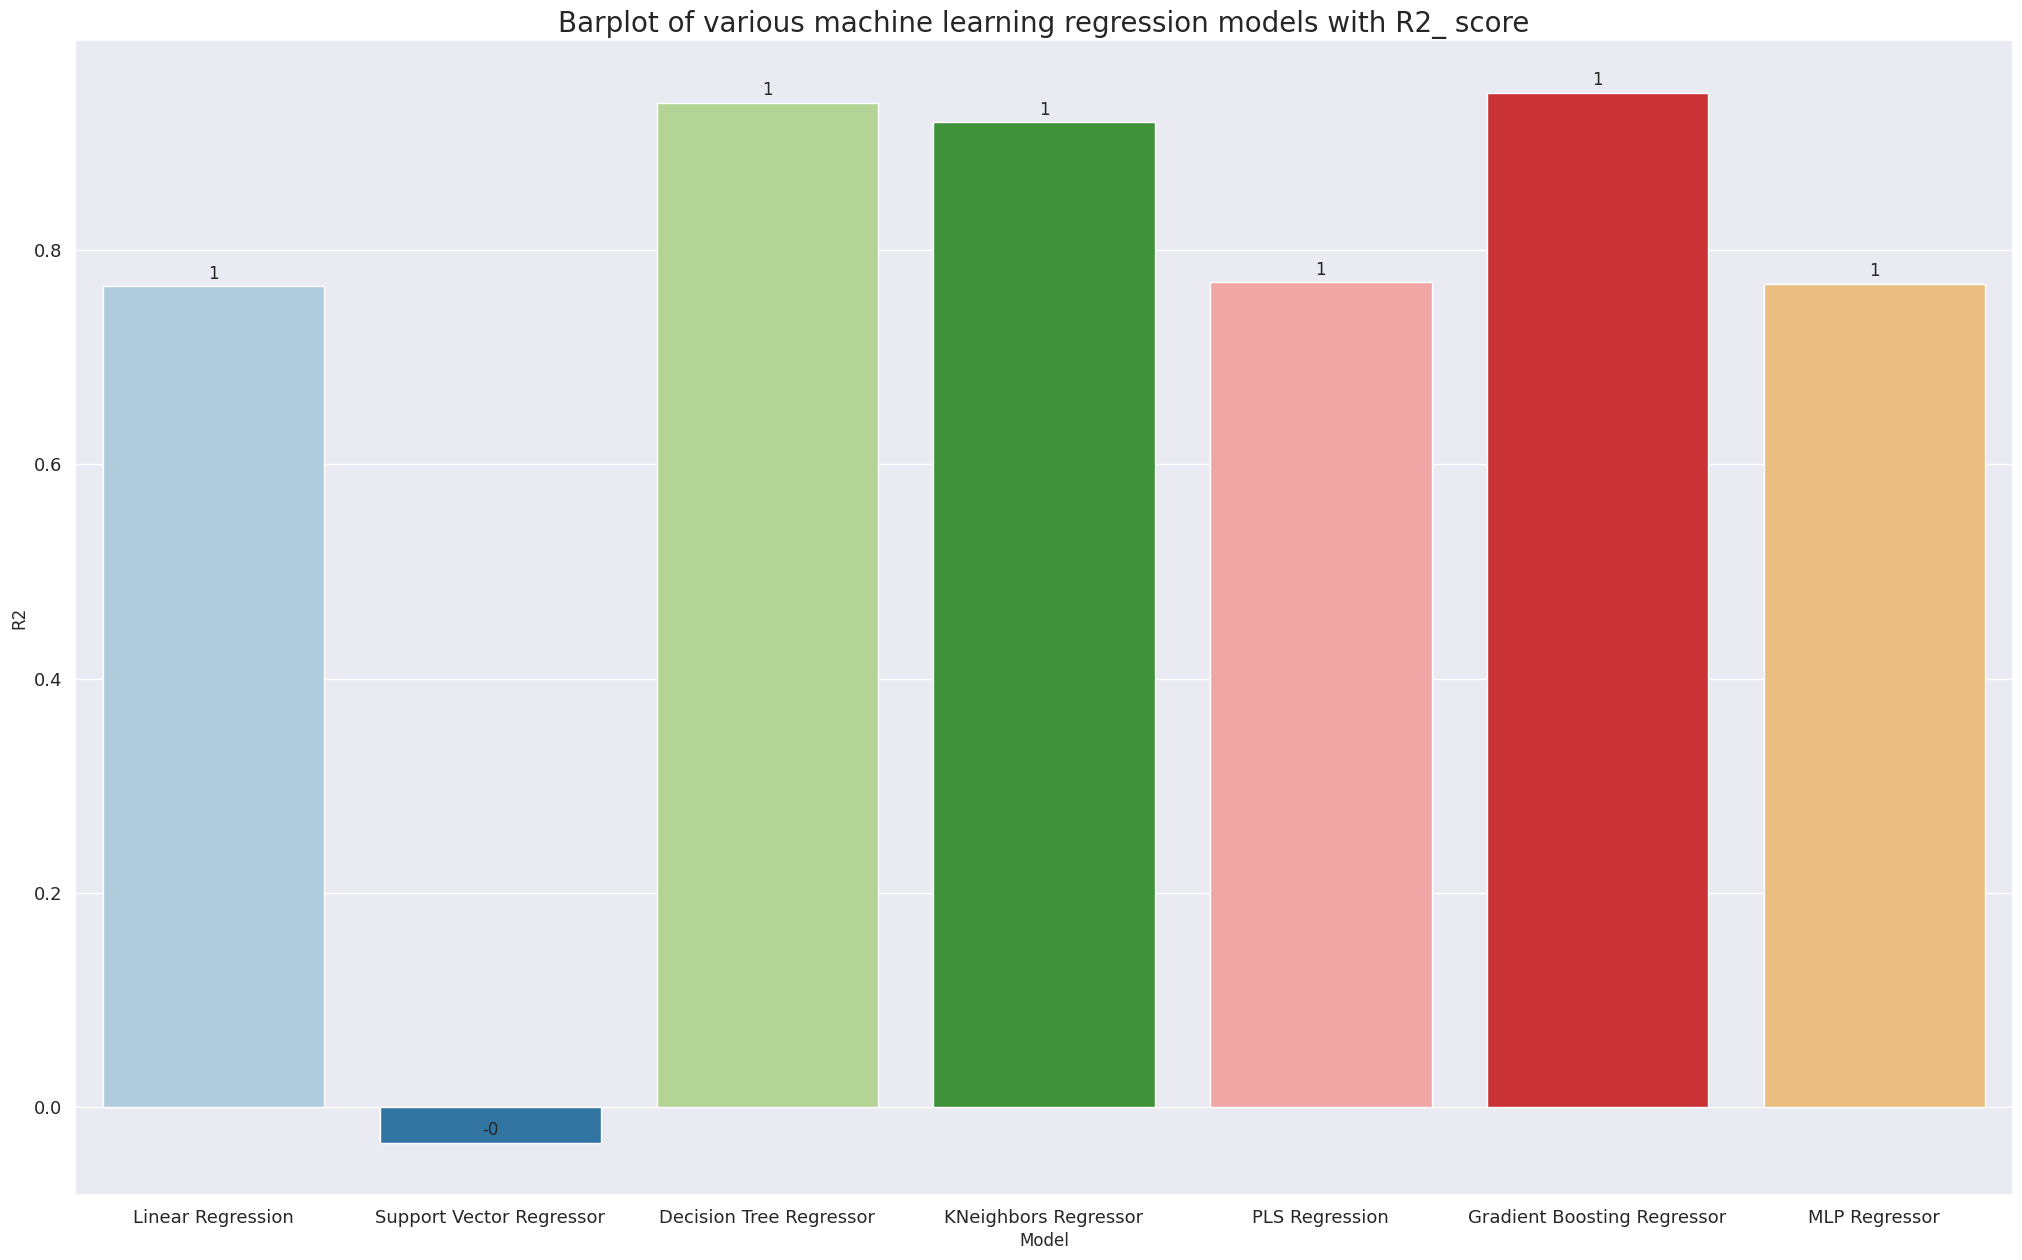

In [146]:
# Barplot of machine learning models MAE, MSE, R2_score
plt.figure(figsize = (25, 15))
splot = sns.barplot(data = results_df, x = 'Model', y = 'R2', palette = 'Paired')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with R2_ score", fontsize = 20)
plt.show()

In [148]:
results_df

,Model,MAE,MSE,R2
0,Linear Regression,13253.657420,5.967248e+08,0.766230
1,Support Vector Regressor,22363.459816,2.637317e+09,-0.033181
2,Decision Tree Regressor,3489.099179,1.594201e+08,0.937546
3,KNeighbors Regressor,4369.467962,2.056551e+08,0.919434
4,PLS Regression,14293.287989,5.871646e+08,0.769976
5,Gradient Boosting Regressor,4357.803046,1.356526e+08,0.946857
6,MLP Regressor,11779.441192,5.908976e+08,0.768513


###Conclusion



* We can see that using different machine learning models would lead to different values of mean absolute error and mean squared error respectively.
* We would have to first convert all the categorical features into numerical features before we give those data points to the machine learning models for prediction. If we just give categorical features directly, there would be an error in the machine learning models respectively.
* It is always good to shuffle the data before we split the data into training and testing set. This is done so that we have more randomness in the training data so that the machine learning models would work well on new data.
* We have to always ensure that there are no missing values in our data. We have to replace those values so that there is no problem when we are using different machine learning models for prediction.
* We have to also remove the outliers in our data as they would completely change some of the important predictions and lead to an increase in the error respectively.


